<a href="https://colab.research.google.com/github/juli66257/ProyectoIntegrador1Semestre/blob/main/Code/cleaning_and_wrangling_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ! pip uninstall scikit-learn
# ! pip install scikit-learn==1.0.2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/notebooks"

!pip install import_ipynb
import import_ipynb
from AWS_S3_Interaction import get_buckets_from_S3, upload_file_to_S3
from AWS_S3_Interaction import delete_file_from_S3, download_from_S3

/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/notebooks
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
importing Jupyter notebook from AWS_S3_Interaction.ipynb
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 29.6 MB/s 
     |████████████████████████████████| 79 kB 9.0 MB/s 
     |████████████████████████████████| 8.9 MB 48.1 MB/s 
     |████████████████████████████████| 138 kB 55.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is inc

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pickle
warnings.filterwarnings("ignore")

sns.set_context('notebook')

pd.options.display.max_columns = None
pd.options.display.max_rows= None

In [ ]:
# import preprocessing from sklearn
from sklearn import preprocessing
from numpy import array
from numpy import argmax
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
BUCKET_NAME = 'datalake-fraud-detection'

download_from_S3(
    bucket = BUCKET_NAME,
    object_name = 'RAW-zone/application_data.csv',
    file_path = '/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/data lake/application_data.csv'
)

True

In [ ]:
path = '/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/data lake/application_data.csv'
data = pd.read_csv(path)

data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## **Tratamiento de valores faltantes:**    


### Dataframe con el resultado del conteo de valores únicos y faltantes


In [ ]:
variables = data.columns.to_list()

df_variables = pd.DataFrame(variables, columns = ['Variable'])
df_variables.head()

,Variable
0,SK_ID_CURR
1,TARGET
2,NAME_CONTRACT_TYPE
3,CODE_GENDER
4,FLAG_OWN_CAR


In [ ]:
total_rows = data.shape[0]
null_values_count = {}
unique_values_count = {}
unique_values = {}

for attribute in variables:
  null_values_count[attribute] = data[attribute].isna().sum() / total_rows
  unique_values_count[attribute] = len(data[attribute].unique()) / total_rows
  unique_values[attribute] = len(data[attribute].unique()) 

df_variables['% Valores nulos'] = df_variables['Variable'].map(null_values_count)
df_variables['% Valores únicos'] = df_variables['Variable'].map(unique_values_count)
df_variables['Cantidad valores únicos'] = df_variables['Variable'].map(unique_values)

df_variables.head()

,Variable,% Valores nulos,% Valores únicos,Cantidad valores únicos
0,SK_ID_CURR,0.0,1.000000,307511
1,TARGET,0.0,0.000007,2
2,NAME_CONTRACT_TYPE,0.0,0.000007,2
3,CODE_GENDER,0.0,0.000010,3
4,FLAG_OWN_CAR,0.0,0.000007,2


In [ ]:
unique_values_detail = {}

variables_for_unique_values = df_variables[df_variables['Cantidad valores únicos'] <= 10]['Variable'].to_list()

for attribute in variables_for_unique_values:
  unique_values_detail[attribute] = list(data[attribute].unique())

df_variables['Opciones'] = df_variables['Variable'].map(unique_values_detail)
df_variables['Opciones'].fillna('', inplace = True)

df_variables.head()

,Variable,% Valores nulos,% Valores únicos,Cantidad valores únicos,Opciones
0,SK_ID_CURR,0.0,1.000000,307511,
1,TARGET,0.0,0.000007,2,"[1, 0]"
2,NAME_CONTRACT_TYPE,0.0,0.000007,2,"[Cash loans, Revolving loans]"
3,CODE_GENDER,0.0,0.000010,3,"[M, F, XNA]"
4,FLAG_OWN_CAR,0.0,0.000007,2,"[N, Y]"


57 Variables con más del 10% de valores faltantes. 
50 Variables son descartadas por la cantidad de valores faltantes 


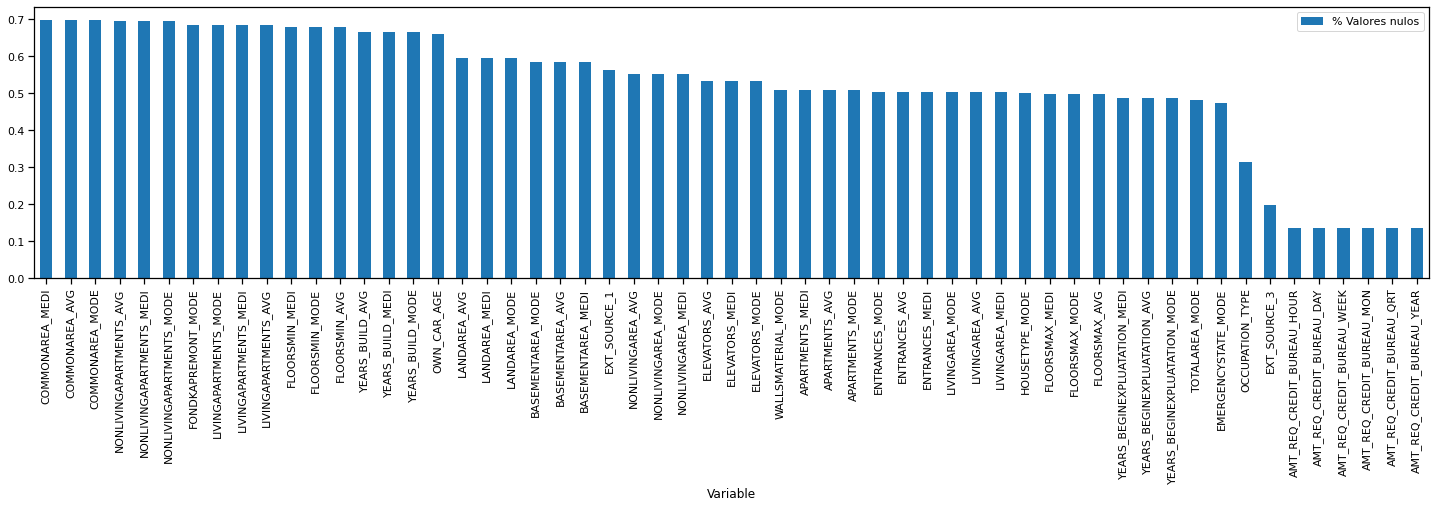

In [ ]:
df_variables[df_variables['% Valores nulos'] >= 0.1].sort_values(
    by = '% Valores nulos',
    ascending = False).plot(
        kind = 'bar',
        x = 'Variable',
        y = '% Valores nulos',
        figsize = (25, 5)
    )

print(f"{len(df_variables[df_variables['% Valores nulos'] >= 0.1])} Variables con más del 10% de valores faltantes. ")
print(f"{len(df_variables[df_variables['% Valores nulos'] >= 0.2])} Variables son descartadas por la cantidad de valores faltantes ")
plt.show()

#### Valores faltantes para FLAG_OWN_CAR:

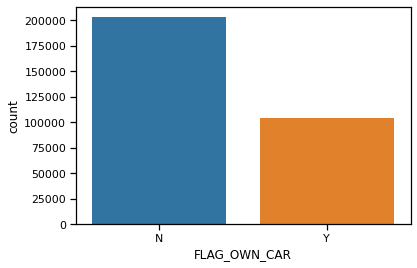

In [ ]:
sns.countplot(
    data['FLAG_OWN_CAR'],
    x = 'FLAG_OWN_CAR'
)
plt.show()

In [ ]:
print(f"Valores faltantes en la edad del carro respecto a la tenencia de uno: {data[data['FLAG_OWN_CAR']=='Y']['OWN_CAR_AGE'].isna().sum()}")

Valores faltantes en la edad del carro respecto a la tenencia de uno: 5


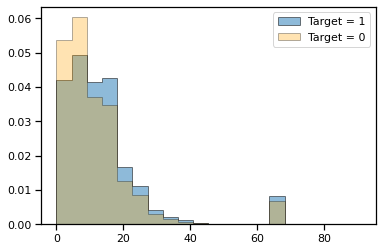

In [ ]:
plt.figure()
plt.hist(
    data[data['TARGET'] == 1]['OWN_CAR_AGE'],
    bins = 20,
    edgecolor = 'black',
    alpha = 0.5,
    label = 'Target = 1',
    density = True,
    histtype = 'stepfilled'
)
plt.hist(
    data[data['TARGET'] == 0]['OWN_CAR_AGE'],
    bins = 20,
    edgecolor = 'black',
    color = 'orange',
    alpha = 0.3,
    label = 'Target = 0',
    density = True,
    histtype = 'stepfilled'
)
plt.legend()
plt.show()

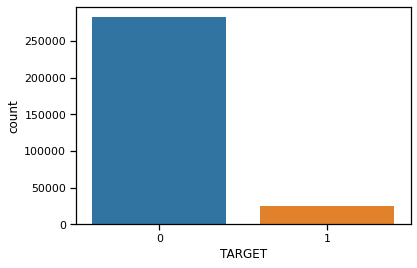

In [ ]:
sns.countplot(
    data = data[['TARGET']],
    x = 'TARGET'
)
plt.show()

In [ ]:
print(f"Valores faltantes de OWN_CAR_AGE con target = 1: {data[data['TARGET'] == 1]['OWN_CAR_AGE'].isna().sum()}")
print(f"Valores faltantes de OWN_CAR_AGE con target = 0: {data[data['TARGET'] == 0]['OWN_CAR_AGE'].isna().sum()}")
print(f"Relación respecto al total de target = 1: {data[data['TARGET'] == 1]['OWN_CAR_AGE'].isna().sum()/data['OWN_CAR_AGE'].isna().sum()}")

Valores faltantes de OWN_CAR_AGE con target = 1: 17249
Valores faltantes de OWN_CAR_AGE con target = 0: 185680
Relación respecto al total de target = 1: 0.08500017247411656


In [ ]:
data[~data['OWN_CAR_AGE'].isna()].corr()['OWN_CAR_AGE'].sort_values(ascending = False).to_frame()

,OWN_CAR_AGE
OWN_CAR_AGE,1.000000
REGION_RATING_CLIENT_W_CITY,0.088820
REGION_RATING_CLIENT,0.087494
TARGET,0.037612
FLAG_DOCUMENT_3,0.036403
DAYS_EMPLOYED,0.028830
FLAG_DOCUMENT_6,0.023365
REG_CITY_NOT_WORK_CITY,0.016292
DEF_60_CNT_SOCIAL_CIRCLE,0.013295
FLAG_CONT_MOBILE,0.012298


### Creación data trusted:

In [ ]:
data_trusted = data.copy()

En función de lo observado para la variable OWN_CAR_AGE, se opta por descartar dicho atributo del dataset, aún más considerando la cantidad de valores faltantes presentes, los cuales están por encima del 70%.

In [ ]:
data_trusted.drop(columns = 'OWN_CAR_AGE', inplace = True)
print(f'Shape del dataset refinado: {data_trusted.shape}')

Shape del dataset refinado: (307511, 121)


#### Análisis de los valores faltantes para esos atributos que corresponden a medidas agrupadas:

In [ ]:
attributes = data.columns.to_list()
grouped_attributes = [attr for attr in attributes if 'MODE' in attr or 'AVG' in attr or 'MEDI' in attr]

print(f'Cantidad de atributos agrupados: {len(grouped_attributes)}')
data[grouped_attributes].isna().sum().to_frame()

Cantidad de atributos agrupados: 47


,0
APARTMENTS_AVG,156061
BASEMENTAREA_AVG,179943
YEARS_BEGINEXPLUATATION_AVG,150007
YEARS_BUILD_AVG,204488
COMMONAREA_AVG,214865
ELEVATORS_AVG,163891
ENTRANCES_AVG,154828
FLOORSMAX_AVG,153020
FLOORSMIN_AVG,208642
LANDAREA_AVG,182590


Teniendo en cuenta que para los atributos que están agrupados se presentan en el de menos, apróximadamente la mitad de los valore faltantes, éstos se descartan

In [ ]:
data_trusted.drop(
    columns = grouped_attributes,
    inplace = True
)
print(f'Shape del dataset refinado: {data_trusted.shape}')

Shape del dataset refinado: (307511, 74)


#### **Checkpoint - Valores faltantes:**

9 Variables con más del 10% de valores faltantes. 
2 Variables son descartadas por la cantidad de valores faltantes 


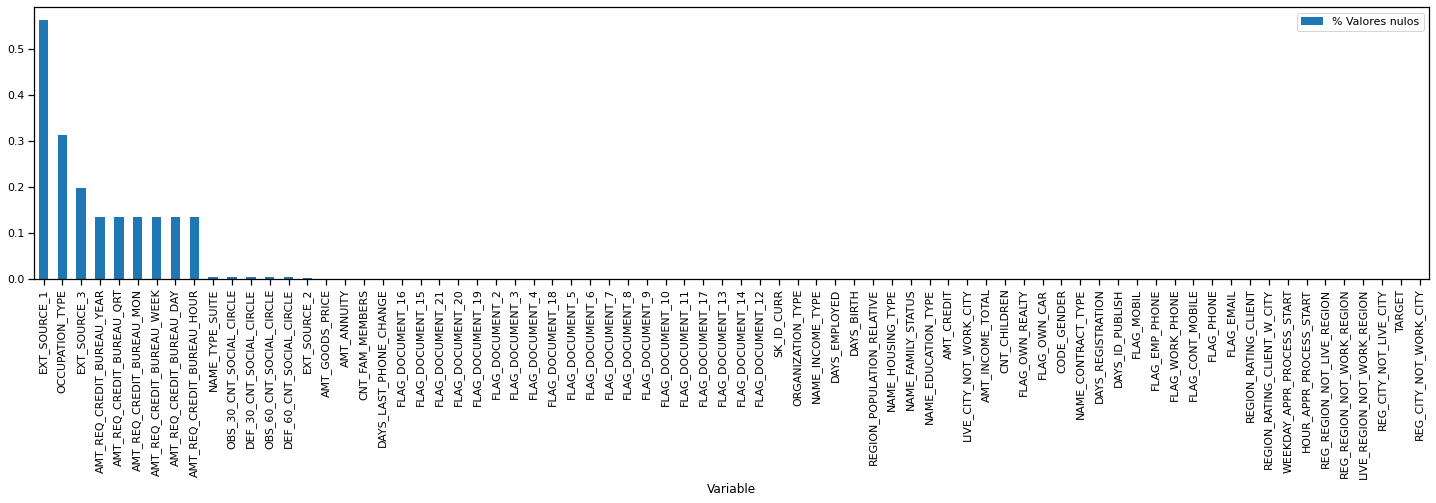

In [ ]:
mask_attributes = data_trusted.columns.to_list()

df_variables_trusted = df_variables[df_variables['Variable'].isin(mask_attributes)]

df_variables_trusted.sort_values(
    by = '% Valores nulos',
    ascending = False).plot(
        kind = 'bar',
        x = 'Variable',
        y = '% Valores nulos',
        figsize = (25, 5)
    )

print(f"{len(df_variables_trusted[df_variables_trusted['% Valores nulos'] >= 0.1])} Variables con más del 10% de valores faltantes. ")
print(f"{len(df_variables_trusted[df_variables_trusted['% Valores nulos'] >= 0.2])} Variables son descartadas por la cantidad de valores faltantes ")
plt.show()

#### Valores faltantes para EXT_SOURCES_n

In [ ]:
data_trusted.drop(
    columns = 'EXT_SOURCE_1',
    inplace = True
)
print(f'Shape del dataset refinado: {data_trusted.shape}')

Shape del dataset refinado: (307511, 73)


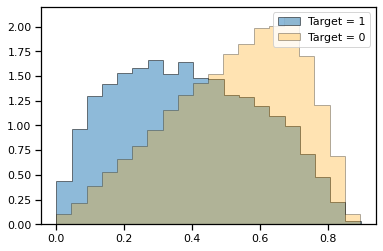

In [ ]:
plt.figure()
plt.hist(
    data_trusted[data_trusted['TARGET'] == 1]['EXT_SOURCE_3'],
    bins = 20,
    edgecolor = 'black',
    alpha = 0.5,
    label = 'Target = 1',
    density = True,
    histtype = 'stepfilled'
)
plt.hist(
    data_trusted[data_trusted['TARGET'] == 0]['EXT_SOURCE_3'],
    bins = 20,
    edgecolor = 'black',
    color = 'orange',
    alpha = 0.3,
    label = 'Target = 0',
    density = True,
    histtype = 'stepfilled'
)
plt.legend()
plt.show()

El atributo 'EXT_SOURCE_3' posiblemente tenga un impacto sobre la variable objeivo, teniendo en cuenta que la ditribución de este cambia en función de ella. Por eso, no se descarta en función de sus valores faltantes, y en cambio se realizará la imputación de estos mediante uno de los siguientes métodos:

- Imputar con la mediana o con vecinos cercanos
- Ajustar una distribución continua y generar valores aleatorios
- Imputación mediante una regresión

#### Análisis valores faltantes para OCCUPATION TYPE

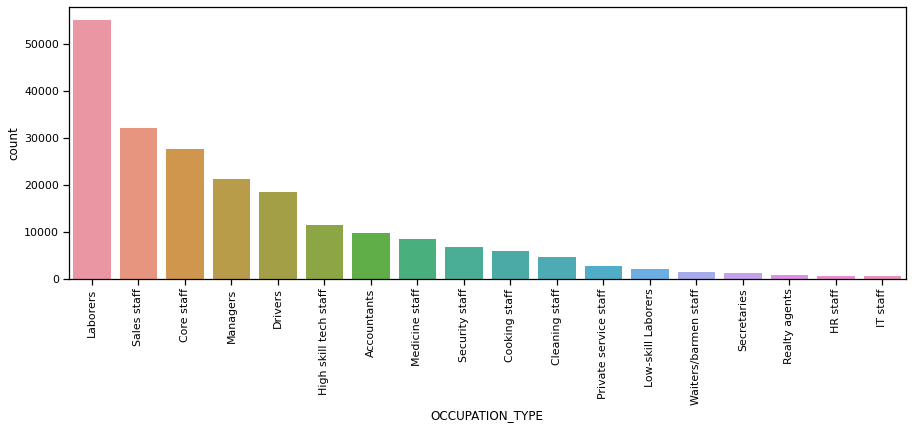

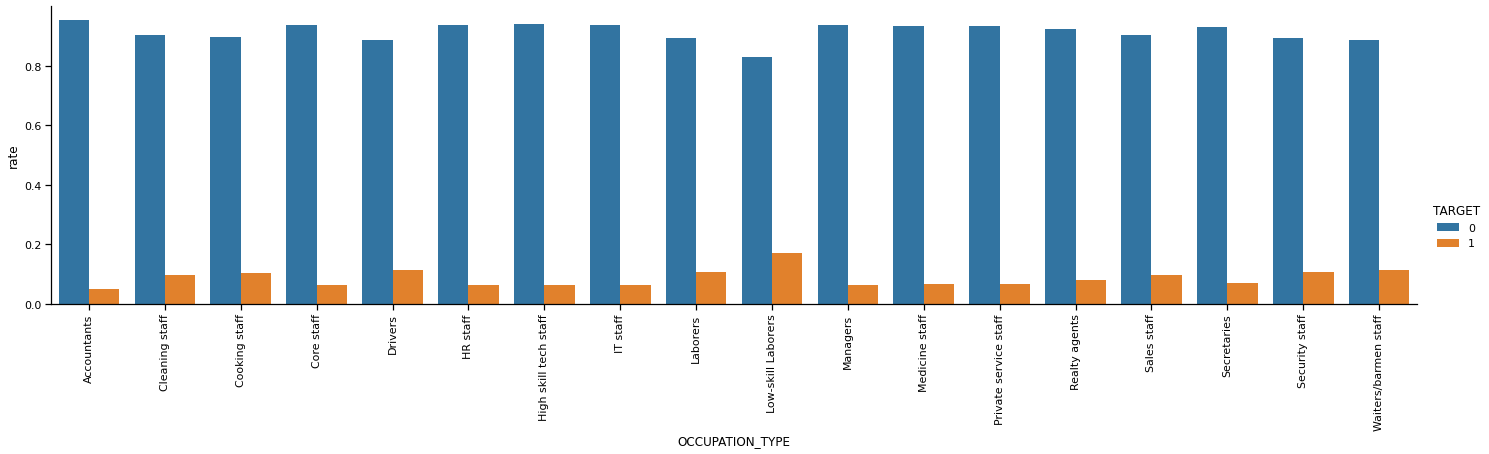

In [ ]:
plt.figure(figsize = (15, 5))
sns.countplot(
    data = data_trusted[['OCCUPATION_TYPE']],
    x = 'OCCUPATION_TYPE',
    order = data_trusted[['OCCUPATION_TYPE', 'TARGET']].groupby(by = 'OCCUPATION_TYPE').count().sort_values(by = 'TARGET', ascending = False).index
)
plt.xticks(rotation = 'vertical')
plt.show()
plt.close()

#  Haciendo el conteo similar, teniendo en cuenta el target 

(data_trusted[['OCCUPATION_TYPE', 'TARGET']]
.groupby('OCCUPATION_TYPE')['TARGET']
.value_counts(normalize=True)
.rename('rate')
.reset_index()
.pipe((sns.catplot,'data'), x = 'OCCUPATION_TYPE', y = 'rate', hue = 'TARGET', kind='bar', height = 5, aspect = 4))
plt.xticks(rotation = 'vertical')
plt.show()


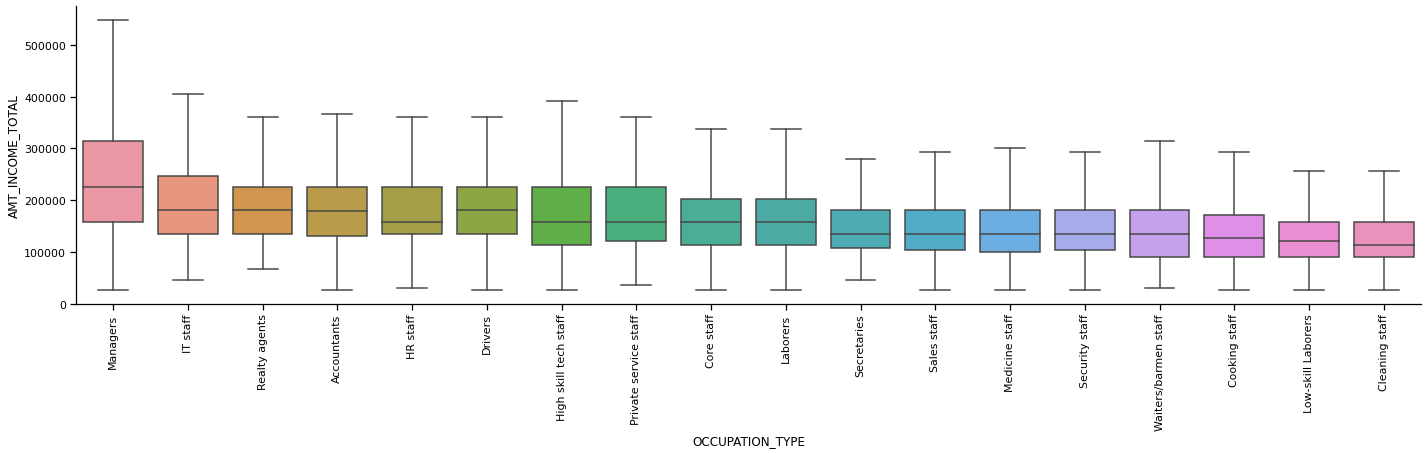

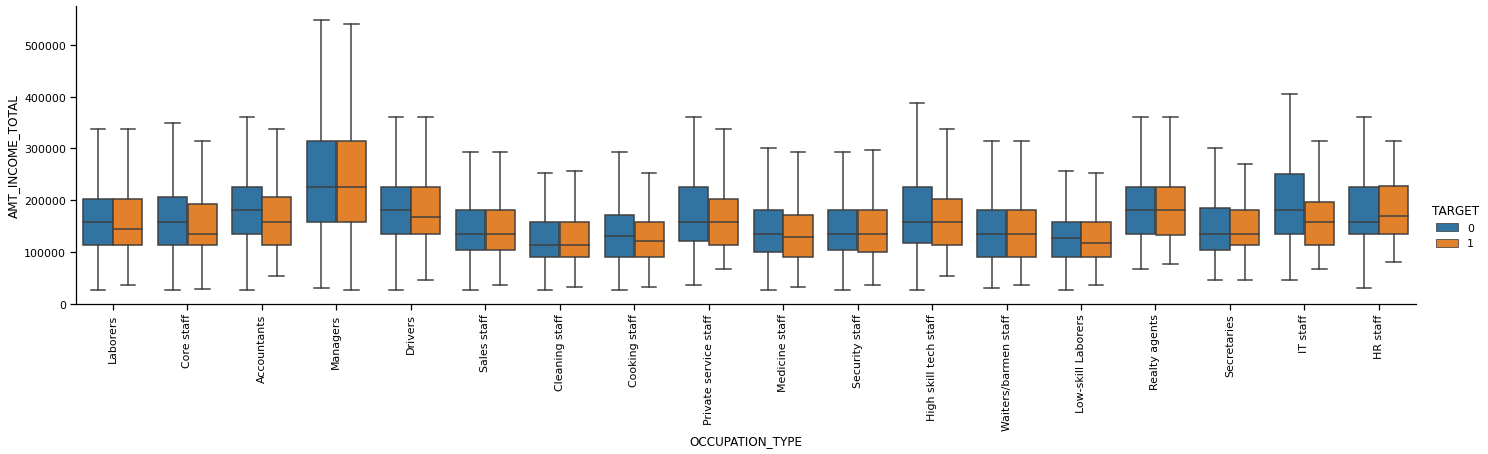

In [ ]:
sns.catplot(
    data = data_trusted[['OCCUPATION_TYPE', 'TARGET', 'AMT_INCOME_TOTAL']],
    x = 'OCCUPATION_TYPE',
    y = 'AMT_INCOME_TOTAL',
    kind = 'box',
    showfliers = False,
    order = data_trusted[['OCCUPATION_TYPE', 'TARGET', 'AMT_INCOME_TOTAL']].groupby(by = 'OCCUPATION_TYPE').mean().sort_values(by = 'AMT_INCOME_TOTAL', ascending = False).index,
    aspect = 4,
    height = 5
)
plt.xticks(rotation = 'vertical')
plt.show()
plt.close()

sns.catplot(
    data = data_trusted[['OCCUPATION_TYPE', 'TARGET', 'AMT_INCOME_TOTAL']],
    x = 'OCCUPATION_TYPE',
    y = 'AMT_INCOME_TOTAL',
    hue = 'TARGET',
    kind = 'box',
    showfliers = False,
    aspect = 4,
    height = 5
)
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
bins = []

for i in range(0, 10000001 - 20000, 20000):
    bins.append((i, i + 19999))

bins_index = pd.IntervalIndex.from_tuples(bins)

intervals_amt = pd.cut(
    x = data_trusted['AMT_INCOME_TOTAL'],
    bins = bins_index
)

df_temp_amt = data_trusted[['SK_ID_CURR','OCCUPATION_TYPE', 'TARGET', 'AMT_INCOME_TOTAL']]
df_temp_amt['INTERVAL_AMT_TOTAL'] = df_temp_amt.index.map(intervals_amt)
df_temp_amt.head()

,SK_ID_CURR,OCCUPATION_TYPE,TARGET,AMT_INCOME_TOTAL,INTERVAL_AMT_TOTAL
0,100002,Laborers,1,202500.0,"(200000, 219999]"
1,100003,Core staff,0,270000.0,"(260000, 279999]"
2,100004,Laborers,0,67500.0,"(60000, 79999]"
3,100006,Laborers,0,135000.0,"(120000, 139999]"
4,100007,Core staff,0,121500.0,"(120000, 139999]"


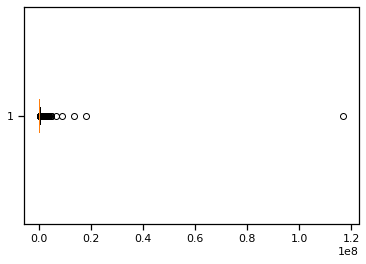

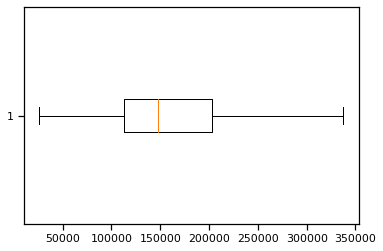

In [ ]:
plt.boxplot(
    x = data_trusted['AMT_INCOME_TOTAL'],
    vert = False
)
plt.show()

plt.boxplot(
    x = data_trusted['AMT_INCOME_TOTAL'],
    vert = False,
    showfliers = False
)
plt.show()

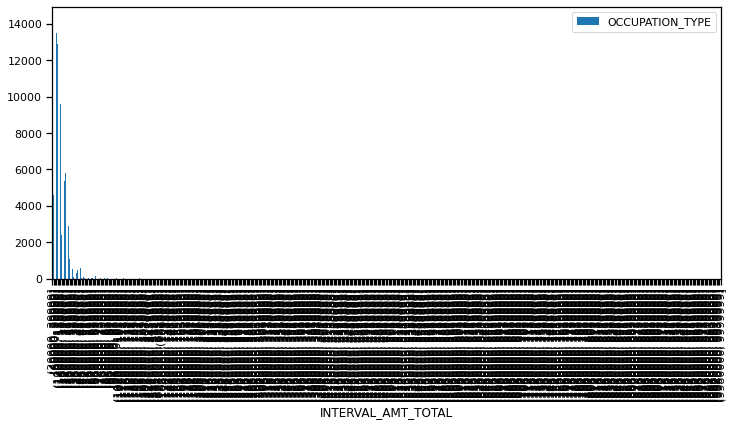

In [ ]:
(df_temp_amt
.drop('INTERVAL_AMT_TOTAL', 1)
.isna()
.groupby(df_temp_amt.INTERVAL_AMT_TOTAL, sort = False)
.sum()['OCCUPATION_TYPE']
.reset_index()
.plot(
    kind = 'bar',
    x = 'INTERVAL_AMT_TOTAL',
    figsize = (12, 5)
    )
)
plt.show()

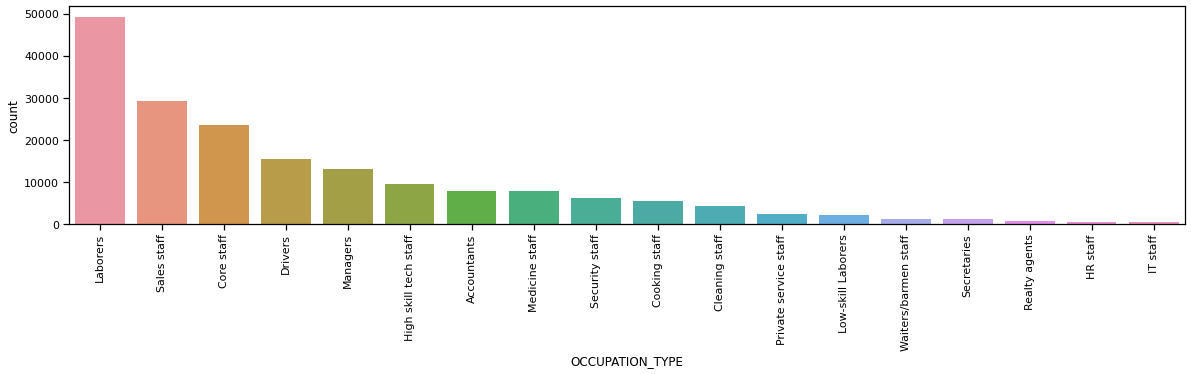

In [ ]:
plt.figure(figsize = (20, 4))
sns.countplot(
    data = df_temp_amt[(df_temp_amt['AMT_INCOME_TOTAL'] >= 50000) & (df_temp_amt['AMT_INCOME_TOTAL'] < 250000)],
    x = 'OCCUPATION_TYPE',
    order = df_temp_amt[(df_temp_amt['AMT_INCOME_TOTAL'] >= 50000) & (df_temp_amt['AMT_INCOME_TOTAL'] < 250000)].groupby(by = 'OCCUPATION_TYPE').count().sort_values(by = 'AMT_INCOME_TOTAL', ascending = False).index
)
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
df_occupation_imp = df_temp_amt.groupby(by = 'INTERVAL_AMT_TOTAL').agg(pd.Series.mode)['OCCUPATION_TYPE'].reset_index()
df_occupation_imp.rename(
    columns = {'OCCUPATION_TYPE':'OCCUPATION_TYPE_IMP'},
    inplace = True
)
df_temp_amt = df_temp_amt.merge(
    df_occupation_imp,
    on = 'INTERVAL_AMT_TOTAL'
)
df_temp_amt.head()

,SK_ID_CURR,OCCUPATION_TYPE,TARGET,AMT_INCOME_TOTAL,INTERVAL_AMT_TOTAL,OCCUPATION_TYPE_IMP
0,100002,Laborers,1,202500.0,"(200000, 219999]",Laborers
1,100025,Sales staff,0,202500.0,"(200000, 219999]",Laborers
2,100047,Laborers,1,202500.0,"(200000, 219999]",Laborers
3,100048,Laborers,0,202500.0,"(200000, 219999]",Laborers
4,100051,NaN,0,202500.0,"(200000, 219999]",Laborers


In [ ]:
df_temp_amt['OCCUPATION_TYPE_NEW'] = np.where(
    df_temp_amt['OCCUPATION_TYPE'].isna(),
    df_temp_amt['OCCUPATION_TYPE_IMP'],
    df_temp_amt['OCCUPATION_TYPE']
)

print(df_temp_amt.shape)
df_temp_amt.isna().sum()

(277635, 7)


SK_ID_CURR                 0
OCCUPATION_TYPE        88759
TARGET                     0
AMT_INCOME_TOTAL           0
INTERVAL_AMT_TOTAL         0
OCCUPATION_TYPE_IMP        0
OCCUPATION_TYPE_NEW        0
dtype: int64

In [ ]:
def clean_occupation(string):
    if type(string) == str:
        return string
    elif isinstance(string, (list, pd.core.series.Series, np.ndarray)) and len(string) > 0:
        string_ = string[0]
        return string_
    elif isinstance(string, (list, pd.core.series.Series, np.ndarray)) and len(string) == 0:
        string_ = np.nan
        return string_

df_temp_amt['OCCUPATION_TYPE_NEW'].apply(clean_occupation).value_counts()
    

Laborers                 133187
Sales staff               29433
Core staff                25680
Managers                  22129
Drivers                   15989
High skill tech staff     10110
Accountants                8743
Medicine staff             7912
Security staff             6188
Cooking staff              5561
Cleaning staff             4401
Private service staff      2311
Low-skill Laborers         1942
Waiters/barmen staff       1249
Secretaries                1195
Realty agents               645
HR staff                    505
IT staff                    453
Name: OCCUPATION_TYPE_NEW, dtype: int64

In [ ]:
print(f'Shape del dataset refinado: {data_trusted.shape}')

Shape del dataset refinado: (307511, 73)


In [ ]:
data_trusted = data_trusted.merge(
    right = df_temp_amt[['OCCUPATION_TYPE_NEW', 'SK_ID_CURR']],
    on = 'SK_ID_CURR',
    how = 'left'
)
print(f'Shape del dataset refinado: {data_trusted.shape}')

Shape del dataset refinado: (307511, 74)


In [ ]:
data_trusted['OCCUPATION_TYPE_NEW'].isna().sum()

29876

In [ ]:
##data_trusted['OCCUPATION_TYPE'] = data_trusted['OCCUPATION_TYPE_NEW'].values

##data_trusted.drop(
  ##  columns = 'OCCUPATION_TYPE_NEW',
    ##inplace = True
#)
print(f'Shape del dataset refinado: {data_trusted.shape}')

Shape del dataset refinado: (307511, 74)


#### **Checkpoint - Valores faltantes**

8 Variables con más del 10% de valores faltantes. 
1 Variables son descartadas por la cantidad de valores faltantes 


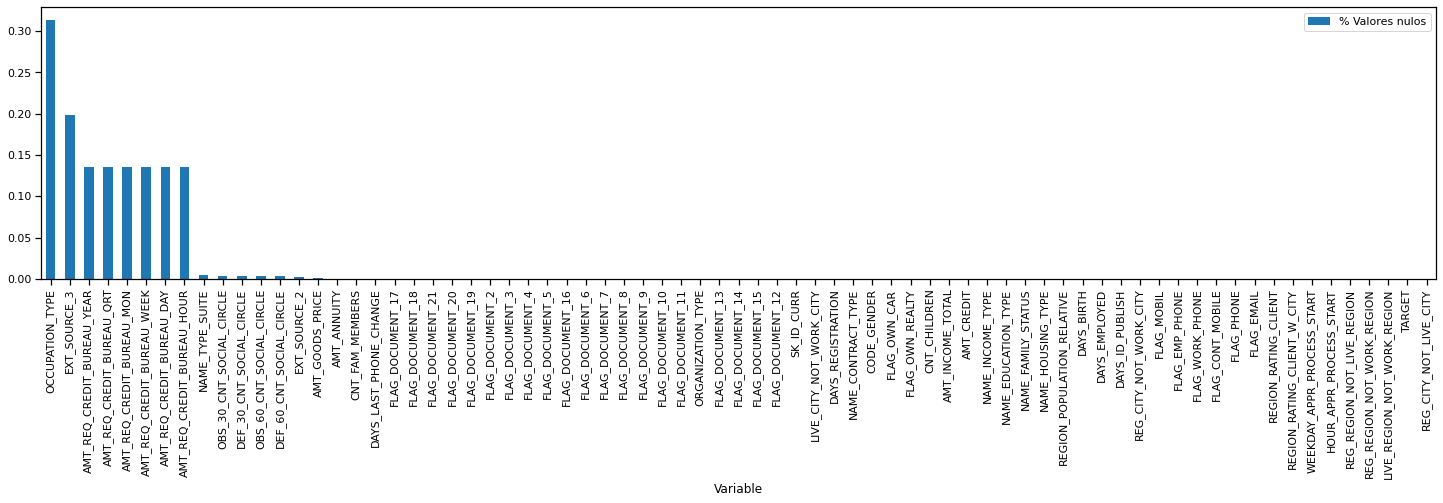

In [ ]:
mask_attributes = data_trusted.columns.to_list()

total_rows = data_trusted.shape[0]
null_values_count = {}
unique_values_count = {}
unique_values = {}

for attribute in mask_attributes:
  null_values_count[attribute] = data_trusted[attribute].isna().sum() / total_rows

df_variables['% Valores nulos'] = df_variables['Variable'].map(null_values_count)

df_variables_trusted = df_variables[df_variables['Variable'].isin(mask_attributes)]

df_variables_trusted.sort_values(
    by = '% Valores nulos',
    ascending = False).plot(
        kind = 'bar',
        x = 'Variable',
        y = '% Valores nulos',
        figsize = (25, 5)
    )

print(f"{len(df_variables_trusted[df_variables_trusted['% Valores nulos'] >= 0.1])} Variables con más del 10% de valores faltantes. ")
print(f"{len(df_variables_trusted[df_variables_trusted['% Valores nulos'] >= 0.2])} Variables son descartadas por la cantidad de valores faltantes ")
plt.show()

#### Atributos descartados por valores faltantes y desbalanceo:

In [ ]:
attr_discard = [
                'FLAG_MOBIL',
                'FLAG_CONT_MOBILE',
                'FLAG_DOCUMENT_2',
                'FLAG_DOCUMENT_4',
                'FLAG_DOCUMENT_7',
                'FLAG_DOCUMENT_10',
                'FLAG_DOCUMENT_12',
                'FLAG_DOCUMENT_17',
                'AMT_REQ_CREDIT_BUREAU_HOUR',
                'AMT_REQ_CREDIT_BUREAU_DAY',
                'AMT_REQ_CREDIT_BUREAU_WEEK',
                'AMT_REQ_CREDIT_BUREAU_MON',
                'AMT_REQ_CREDIT_BUREAU_QRT'
]

data_trusted.drop(
    columns = attr_discard,
    inplace = True
)
data_trusted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 61 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

#### Eliminando variable correlacionada

In [ ]:
data_trusted.drop(
    columns = [
               'AMT_GOODS_PRICE',
               'OCCUPATION_TYPE_NEW'
    ],
    inplace = True
)
print(f'Shape del dataset refinado: {data_trusted.shape}')

Shape del dataset refinado: (307511, 59)


### **Creación Data Refined:**

In [ ]:
data_trusted.to_csv("/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/data lake/data_trusted.csv")

upload_file_to_S3(
    file_name = "/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/data lake/data_trusted.csv",
    bucket = BUCKET_NAME,
    folder = 'TRUSTED-zone'
)

In [ ]:
data_refined = data_trusted.copy()

## **Encoding de variables categóricas**

### Label encode para binarias

In [ ]:
# Seleccionar solo variables categoricas
data_refined_categorical = data_refined.select_dtypes(include=[object])
data_refined_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   NAME_CONTRACT_TYPE          307511 non-null  object
 1   CODE_GENDER                 307511 non-null  object
 2   FLAG_OWN_CAR                307511 non-null  object
 3   FLAG_OWN_REALTY             307511 non-null  object
 4   NAME_TYPE_SUITE             306219 non-null  object
 5   NAME_INCOME_TYPE            307511 non-null  object
 6   NAME_EDUCATION_TYPE         307511 non-null  object
 7   NAME_FAMILY_STATUS          307511 non-null  object
 8   NAME_HOUSING_TYPE           307511 non-null  object
 9   OCCUPATION_TYPE             211120 non-null  object
 10  WEEKDAY_APPR_PROCESS_START  307511 non-null  object
 11  ORGANIZATION_TYPE           307511 non-null  object
dtypes: object(12)
memory usage: 30.5+ MB


In [ ]:
# Aplicar LabelEncoder object para cada variable
# encode labels con valores entre  0 and n_classes-1.
le = preprocessing.LabelEncoder()

# use df.apply() to apply le.fit_transform to all columns
data_refined_LabelEncoder = data_refined_categorical.apply(le.fit_transform)

In [ ]:
data_refined_Label = data_refined_LabelEncoder[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]
data_refined_Label.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY
0,0,1,0,1
1,0,0,0,0
2,1,1,1,1
3,0,0,0,1
4,0,1,0,1


In [ ]:
data_refined.drop(['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY'],axis=1, inplace=True)
data_refined.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,0,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,0,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,0,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4,100007,0,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,0,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0


In [ ]:
data_refined = pd.merge(data_refined, data_refined_Label, left_index=True, right_index=True)
print(f'Shape del dataset refinado: {data_refined.shape}')

Shape del dataset refinado: (307511, 59)


### Eliminación de variables desbalanceadas:

In [ ]:
#  'NAME_INCOME_TYPE'

rows_discard = [
                'Unemployed',
                'Student',
                'Businessman',
                'Maternity leave'
]

data_refined = data_refined[~data_refined['NAME_INCOME_TYPE'].isin(rows_discard)]

del rows_discard

print(f'Shape del dataset refinado: {data_refined.shape}')
data_refined['NAME_INCOME_TYPE'].value_counts()

Shape del dataset refinado: (307456, 59)


Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Name: NAME_INCOME_TYPE, dtype: int64

In [ ]:
#  'NAME_FAMILY_STATUS'

data_refined = data_refined[data_refined['NAME_FAMILY_STATUS'] != 'Unknown']

print(f'Shape del dataset refinado: {data_refined.shape}')
data_refined['NAME_FAMILY_STATUS'].value_counts()

Shape del dataset refinado: (307454, 59)


Married                 196401
Single / not married     45433
Civil marriage           29767
Separated                19768
Widow                    16085
Name: NAME_FAMILY_STATUS, dtype: int64

In [ ]:
data_refined = data_refined[data_refined['NAME_EDUCATION_TYPE'] != 'Academic degree']

print(f'Shape del dataset refinado: {data_refined.shape}')
data_refined['NAME_EDUCATION_TYPE'].value_counts()

Shape del dataset refinado: (307290, 59)


Secondary / secondary special    218365
Higher education                  74837
Incomplete higher                 10273
Lower secondary                    3815
Name: NAME_EDUCATION_TYPE, dtype: int64

In [ ]:
data_refined.reset_index(inplace = True)

In [ ]:
data_refined_OHE = data_refined[['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']]

print(f'Shape del dataset refinado: {data_refined_OHE.shape}')
data_refined_OHE.head()

Shape del dataset refinado: (307290, 8)


,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion


Se analiza las variables que tienen muchas opciones, con el fin de realizar el OnehotEncoding para agrupar

##### OHE para NAME_TYPE_SUITE

In [ ]:
data_refined_OHE['NAME_TYPE_SUITE'] = np.where(
    data_refined_OHE['NAME_TYPE_SUITE'] != 'Unaccompanied',
    1,
    0
)
print(f'Shape del dataset refinado: {data_refined_OHE.shape}')
data_refined_OHE['NAME_TYPE_SUITE'].value_counts()

Shape del dataset refinado: (307290, 8)


0    248335
1     58955
Name: NAME_TYPE_SUITE, dtype: int64

In [ ]:
data_refined_OHE.head()

,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,1,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,0,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,0,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion


##### Balanceo de cargas para NAME_INCOME_TYPE

In [ ]:
data_refined_OHE['NAME_INCOME_TYPE'].value_counts()

Working                 158702
Commercial associate     71572
Pensioner                55336
State servant            21680
Name: NAME_INCOME_TYPE, dtype: int64

##### Balanceo de cargas para NAME_EDUCATION

In [ ]:
data_refined_OHE['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218365
Higher education                  74837
Incomplete higher                 10273
Lower secondary                    3815
Name: NAME_EDUCATION_TYPE, dtype: int64

In [ ]:
data_refined_OHE['NAME_EDUCATION_TYPE'] = np.where(
    data_refined_OHE['NAME_EDUCATION_TYPE'] == 'Lower secondary',
    'Incomplete higher',
    data_refined_OHE['NAME_EDUCATION_TYPE']
)

print(f'Shape del dataset refinado: {data_refined_OHE.shape}')
data_refined_OHE['NAME_EDUCATION_TYPE'].value_counts()

Shape del dataset refinado: (307290, 8)


Secondary / secondary special    218365
Higher education                  74837
Incomplete higher                 14088
Name: NAME_EDUCATION_TYPE, dtype: int64

##### Balanceo de cargas para NAME_FAMILY STATUS

In [ ]:
print(f'Shape del dataset refinado: {data_refined_OHE.shape}')
data_refined_OHE['NAME_FAMILY_STATUS'].value_counts()

Shape del dataset refinado: (307290, 8)


Married                 196295
Single / not married     45404
Civil marriage           29759
Separated                19752
Widow                    16080
Name: NAME_FAMILY_STATUS, dtype: int64

##### Balanceo de cargas para NAME_HOUSING_TYPE

In [ ]:
print(f'Shape del dataset refinado: {data_refined_OHE.shape}')
data_refined_OHE['NAME_HOUSING_TYPE'].value_counts()

Shape del dataset refinado: (307290, 8)


House / apartment      272675
With parents            14831
Municipal apartment     11180
Rented apartment         4872
Office apartment         2612
Co-op apartment          1120
Name: NAME_HOUSING_TYPE, dtype: int64

##### Balanceo de cargas para OCCUPATION_TYPE

In [ ]:
print(f'Shape del dataset refinado: {data_refined_OHE.shape}')
data_refined_OHE['OCCUPATION_TYPE'].value_counts()

Shape del dataset refinado: (307290, 8)


Laborers                 55171
Sales staff              32093
Core staff               27539
Managers                 21326
Drivers                  18597
High skill tech staff    11377
Accountants               9802
Medicine staff            8537
Security staff            6717
Cooking staff             5945
Cleaning staff            4651
Private service staff     2650
Low-skill Laborers        2090
Waiters/barmen staff      1347
Secretaries               1305
Realty agents              750
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [ ]:
rows_discard = data_refined_OHE['OCCUPATION_TYPE'].value_counts().tail(10).index.to_list()

data_refined_OHE['OCCUPATION_TYPE'] = np.where(
    data_refined_OHE['OCCUPATION_TYPE'].isin(rows_discard),
    'Others',
    data_refined_OHE['OCCUPATION_TYPE']
)

In [ ]:
data_refined_OHE['OCCUPATION_TYPE'].isna().sum()

96304

In [ ]:
print(f'Shape del dataset refinado: {data_refined_OHE.shape}')
data_refined_OHE['OCCUPATION_TYPE'].value_counts()

Shape del dataset refinado: (307290, 8)


Laborers                 55171
Sales staff              32093
Core staff               27539
Others                   26544
Managers                 21326
Drivers                  18597
High skill tech staff    11377
Accountants               9802
Medicine staff            8537
Name: OCCUPATION_TYPE, dtype: int64

##### Balanceo de cargas para ORGANIZATION_TYPE

In [ ]:
print(f'Shape del dataset refinado: {data_refined_OHE.shape}')
data_refined_OHE['ORGANIZATION_TYPE'].value_counts()

Shape del dataset refinado: (307290, 8)


Business Entity Type 3    67947
XNA                       55326
Self-employed             38398
Other                     16665
Medicine                  11188
Business Entity Type 2    10549
Government                10400
School                     8887
Trade: type 7              7827
Kindergarten               6879
Construction               6721
Business Entity Type 1     5975
Transport: type 4          5395
Trade: type 3              3490
Industry: type 9           3368
Industry: type 3           3277
Security                   3245
Housing                    2957
Industry: type 11          2702
Military                   2632
Bank                       2501
Agriculture                2453
Police                     2337
Transport: type 2          2202
Postal                     2156
Security Ministries        1969
Trade: type 2              1900
Restaurant                 1810
Services                   1574
University                 1311
Industry: type 7           1307
Transpor

### One Hot Encoding

In [ ]:
# TODO: create a OneHotEncoder object, and fit it to all of X

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder(drop = 'first')

# 2. FIT
enc.fit(
    data_refined_OHE.drop(columns = ['NAME_TYPE_SUITE', 'ORGANIZATION_TYPE']),
)

# 3. Transform
onehotlabels = enc.transform(data_refined_OHE.drop(columns = ['NAME_TYPE_SUITE','ORGANIZATION_TYPE'])).toarray()
onehotlabels.shape

(307290, 29)

In [ ]:
enc.categories_

[array(['Commercial associate', 'Pensioner', 'State servant', 'Working'],
       dtype=object), array(['Higher education', 'Incomplete higher',
        'Secondary / secondary special'], dtype=object), array(['Civil marriage', 'Married', 'Separated', 'Single / not married',
        'Widow'], dtype=object), array(['Co-op apartment', 'House / apartment', 'Municipal apartment',
        'Office apartment', 'Rented apartment', 'With parents'],
       dtype=object), array(['Accountants', 'Core staff', 'Drivers', 'High skill tech staff',
        'Laborers', 'Managers', 'Medicine staff', 'Others', 'Sales staff',
        nan], dtype=object), array(['FRIDAY', 'MONDAY', 'SATURDAY', 'SUNDAY', 'THURSDAY', 'TUESDAY',
        'WEDNESDAY'], dtype=object)]

In [ ]:
headers_one_hot_labels = []

for i, headers in enumerate(enc.categories_):
    for j in range(1, len(headers)):
        headers_one_hot_labels.append(headers[j])

df_one_hot_encoded = pd.DataFrame(onehotlabels, columns = headers_one_hot_labels)
df_one_hot_encoded.head()

,Pensioner,State servant,Working,Incomplete higher,Secondary / secondary special,Married,Separated,Single / not married,Widow,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Core staff,Drivers,High skill tech staff,Laborers,Managers,Medicine staff,Others,Sales staff,NaN,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### **Data refined incluyendo el encoding**

In [ ]:
data_refined_enc = pd.merge(data_refined, df_one_hot_encoded, left_index=True, right_index=True)

In [ ]:
print(f'Shape del dataset refinado - encoded: {data_refined_enc.shape}')
data_refined_enc.head()

Shape del dataset refinado - encoded: (307290, 89)


,index,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,Pensioner,State servant,Working,Incomplete higher,Secondary / secondary special,Married,Separated,Single / not married,Widow,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Core staff,Drivers,High skill tech staff,Laborers,Managers,Medicine staff,Others,Sales staff,NaN,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY
0,0,100002,1,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,0,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,1,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,100003,0,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,0,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,100004,0,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,1,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,100006,0,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,0,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,100007,0,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,0,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0,1,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
encoded_attr = ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'index']

data_refined_enc.drop(
    columns = encoded_attr,
    inplace = True
)

print(f'Shape del dataset refinado - encoded: {data_refined_enc.shape}')
data_refined_enc.head()

Shape del dataset refinado - encoded: (307290, 81)


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,Pensioner,State servant,Working,Incomplete higher,Secondary / secondary special,Married,Separated,Single / not married,Widow,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Core staff,Drivers,High skill tech staff,Laborers,Managers,Medicine staff,Others,Sales staff,NaN,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY
0,100002,1,0,202500.0,406597.5,24700.5,0.018801,-9461,-637,-3648.0,-2120,1,0,1,0,1.0,2,2,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,1,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,0.003541,-16765,-1188,-1186.0,-291,1,0,1,0,2.0,1,1,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,1,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,0.008019,-19005,-3039,-9833.0,-2437,1,0,0,0,2.0,2,2,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,0.028663,-19932,-3038,-4311.0,-3458,1,0,0,0,1.0,2,2,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0,1,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Frequency encoding para ORGANIZATION_TYPE

In [ ]:
enc_fq = data_refined_enc.groupby('ORGANIZATION_TYPE').size()/len(data_refined_enc)
data_refined_enc['FQ_ORGANIZATION_TYPE'] = data_refined_enc['ORGANIZATION_TYPE'].map(enc_fq)

data_refined_enc[['FQ_ORGANIZATION_TYPE', 'ORGANIZATION_TYPE']].head()

,FQ_ORGANIZATION_TYPE,ORGANIZATION_TYPE
0,0.221117,Business Entity Type 3
1,0.028921,School
2,0.033844,Government
3,0.221117,Business Entity Type 3
4,0.000277,Religion


In [ ]:
org_type= data_refined_enc[['FQ_ORGANIZATION_TYPE', 'ORGANIZATION_TYPE']].drop_duplicates()

In [ ]:
org_type[['ORGANIZATION_TYPE']]

,ORGANIZATION_TYPE
0,Business Entity Type 3
1,School
2,Government
4,Religion
5,Other
8,XNA
9,Electricity
10,Medicine
12,Business Entity Type 2
13,Self-employed


In [ ]:
data_refined_enc.drop(
    columns = 'ORGANIZATION_TYPE',
    inplace = True
)

print(f'Shape del dataset refinado - encoded: {data_refined_enc.shape}')
data_refined_enc.head()

Shape del dataset refinado - encoded: (307290, 81)


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,Pensioner,State servant,Working,Incomplete higher,Secondary / secondary special,Married,Separated,Single / not married,Widow,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Core staff,Drivers,High skill tech staff,Laborers,Managers,Medicine staff,Others,Sales staff,NaN,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,FQ_ORGANIZATION_TYPE
0,100002,1,0,202500.0,406597.5,24700.5,0.018801,-9461,-637,-3648.0,-2120,1,0,1,0,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,1,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.221117
1,100003,0,0,270000.0,1293502.5,35698.5,0.003541,-16765,-1188,-1186.0,-291,1,0,1,0,2.0,1,1,11,0,0,0,0,0,0,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.028921
2,100004,0,0,67500.0,135000.0,6750.0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,1,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.033844
3,100006,0,0,135000.0,312682.5,29686.5,0.008019,-19005,-3039,-9833.0,-2437,1,0,0,0,2.0,2,2,17,0,0,0,0,0,0,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.221117
4,100007,0,0,121500.0,513000.0,21865.5,0.028663,-19932,-3038,-4311.0,-3458,1,0,0,0,1.0,2,2,11,0,0,0,0,1,1,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0,1,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000277


In [ ]:
data_refined_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307290 entries, 0 to 307289
Data columns (total 81 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   SK_ID_CURR                     307290 non-null  int64  
 1   TARGET                         307290 non-null  int64  
 2   CNT_CHILDREN                   307290 non-null  int64  
 3   AMT_INCOME_TOTAL               307290 non-null  float64
 4   AMT_CREDIT                     307290 non-null  float64
 5   AMT_ANNUITY                    307278 non-null  float64
 6   REGION_POPULATION_RELATIVE     307290 non-null  float64
 7   DAYS_BIRTH                     307290 non-null  int64  
 8   DAYS_EMPLOYED                  307290 non-null  int64  
 9   DAYS_REGISTRATION              307290 non-null  float64
 10  DAYS_ID_PUBLISH                307290 non-null  int64  
 11  FLAG_EMP_PHONE                 307290 non-null  int64  
 12  FLAG_WORK_PHONE               

In [ ]:
data_refined_enc.to_csv("/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/data lake/data_refined_encoded.csv")

upload_file_to_S3(
    file_name = "/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/data lake/data_refined_encoded.csv",
    bucket = BUCKET_NAME,
    folder = 'REFINED-zone'
)

## **Estandarización de datos**

In [ ]:
data_refined_enc = pd.read_csv("/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/data lake/data_refined_encoded.csv")
data_refined_enc.drop(
    columns = 'Unnamed: 0',
    inplace = True
)

In [ ]:
data_refined_enc.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLA

In [ ]:
scaler = preprocessing.StandardScaler()
scaler.fit(data_refined_enc)

scaler.fit(data_refined_enc.drop(columns = ['SK_ID_CURR', 'TARGET']))

array_scaled = scaler.transform(data_refined_enc.drop(columns = ['SK_ID_CURR', 'TARGET']))
data_scaled = pd.DataFrame(
    array_scaled,
    columns = data_refined_enc.drop(columns = ['SK_ID_CURR', 'TARGET']).columns
)

data_scaled.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,Pensioner,State servant,Working,Incomplete higher,Secondary / secondary special,Married,Separated,Single / not married,Widow,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Core staff,Drivers,High skill tech staff,Laborers,Managers,Medicine staff,Others,Sales staff,Unnamed: 74,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,FQ_ORGANIZATION_TYPE
0,-0.577584,0.142334,-0.477952,-0.165929,-0.149306,1.506826,-0.456173,0.379922,0.579151,0.468649,-0.499074,1.599335,-0.245092,-1.265799,-0.103256,-0.062867,-0.631698,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,-1.315926,-1.906718,0.240461,4.156068,0.249724,5.244035,-0.206953,0.638848,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-0.481594,-0.324261,1.38815,-0.717873,0.664535,-0.468644,-0.275514,0.967611,-0.2192,0.638147,-1.329851,-0.262095,2.401647,-0.234985,0.356295,-0.19431,-0.09259,-0.126926,-0.225192,-0.313753,-0.253807,-0.196079,2.137703,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,-0.444376,-0.351737,-0.235701,-0.443783,-0.460926,2.218238,1.322739
1,-0.577584,0.426982,1.726035,0.593311,-1.252967,-0.166808,-0.460073,1.078763,1.790876,0.468649,-0.499074,1.599335,-0.245092,-0.167697,-2.068184,-2.052397,-0.325497,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.564665,NaN,-0.175969,-0.321074,-0.170414,-0.276152,0.163149,0.638848,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-1.016479,-0.324261,-0.72030,-0.717873,-1.504812,-0.468644,3.629586,-1.033473,-0.2192,-1.567038,0.751964,-0.262095,-0.416381,-0.234985,0.356295,-0.19431,-0.09259,-0.126926,-0.225192,3.187218,-0.253807,-0.196079,-0.467792,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,2.250346,-0.351737,-0.235701,-0.443783,-0.460926,-0.450808,-0.923397
2,-0.577584,-0.426962,-1.152880,-1.405130,-0.783513,-0.689475,-0.453256,0.206205,0.306861,0.468649,2.003709,1.599335,-0.245092,-1.265799,-0.103256,-0.062867,-0.937900,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.217469,1.122514,-0.592400,-0.321074,-0.590552,-0.276152,0.178872,-1.565316,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-1.016479,3.083938,1.38815,1.393005,0.664535,-0.468644,-0.275514,0.967611,-0.2192,0.638147,-1.329851,-0.262095,2.401647,-0.234985,0.356295,-0.19431,-0.09259,-0.126926,-0.225192,-0.313753,-0.253807,-0.196079,2.137703,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,2.250346,-0.351737,-0.235701,-0.443783,-0.460926,-0.450808,-0.865855
3,-0.577584,-0.142314,-0.711333,0.178277,-0.929101,-0.680081,-0.473176,-1.375696,0.369137,0.468649,-0.499074,-0.625260,-0.245092,-0.167697,-0.103256,-0.062867,1.511712,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.712245,NaN,0.240461,-0.321074,0.249724,-0.276152,0.418349,0.638848,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.0

In [ ]:
filename_scaler = '/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/data lake/StandardScaler.sav'
pickle.dump(scaler, open(filename_scaler, 'wb'))

upload_file_to_S3(
    file_name = filename_scaler,
    bucket = BUCKET_NAME,
    folder = 'SANDBOX'
)

True

In [ ]:
data_scaled.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,Pensioner,State servant,Working,Incomplete higher,Secondary / secondary special,Married,Separated,Single / not married,Widow,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Core staff,Drivers,High skill tech staff,Laborers,Managers,Medicine staff,Others,Sales staff,Unnamed: 74,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,FQ_ORGANIZATION_TYPE
count,3.072900e+05,3.072900e+05,3.072900e+05,3.072780e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.066300e+05,2.463850e+05,3.062720e+05,3.062720e+05,3.062720e+05,3.062720e+05,3.072890e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,2.658220e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05,3.072900e+05
mean,5.248552e-16,-8.371633e-16,8.472627e-17,-1.294447e-16,6.593855e-16,-1.625640e-16,1.098160e-15,1.622872e-16,-7.374534e-17,-3.949137e-16,-1.261166e-15,1.567281e-15,2.844002e-15,-3.826751e-15,-3.618062e-15,1.139177e-16,1.240658e-16,1.077031e-15,3.799871e-15,-4.667357e-15,8.247962e-15,1.108084e-15,1.926580e-15,-1.892003e-16,-9.372709e-16,-1.478126e-15,-2.881263e-15,1.085629e-15,-2.025625e-15,5.306784e-16,3.736419e-15,-3.413168e-16,-1.629285e-16,2.097723e-15,-1.582553e-15,7.446184e-15,-2.434953e-15,-1.056359e-15,-5.129759e-15,1.456151e-15,5.030939e-15,9.014140e-16,-2.330923e-15,-1.949375e-15,1.168322e-14,3.324534e-15,4.315559e-16,2.827317e-15,8.805602e-16,3.150676e-15,4.292344e-15,3.415904e-15,-9.771972e-15,-7.413200e-16,-6.958037e-15,-2.200219e-15,-8.304344e-15,8.872168e-16,3.666378e-15,2.449186e-15,-4.034324e-16,-1.784961e-15,-2.720504e-15,2.919900e-15,-2.066535e-15,8.366821e-15,1.465499e-15,-3.871484e-16,-1.016828e-14,3.867667e-15,6.954624e-15,1.175235e-15,3.038587e-15,8.086173e-16,6.122786e-15,-3.373484e-15,-1.333935e-15,6.903633e-16,8.553656e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e

In [ ]:
data_scaled = data_scaled.merge(data_refined_enc[['SK_ID_CURR', 'TARGET']], left_index = True, right_index = True)

print(f'Shape del dataset escalado: {data_scaled.shape}')

In [ ]:
data_scaled.isna().sum().sort_values(ascending = False)

In [ ]:
data_scaled.to_csv('/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/data lake/data_scaled.csv')
upload_file_to_S3(
    file_name = "/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/data lake/data_scaled.csv",
    bucket = BUCKET_NAME,
    folder = 'REFINED-zone'
)

True

## **Imputación de valores faltantes restantes:**

### Variables categóricas mediante KNN Imputer

In [ ]:
# define imputer
imputer = KNNImputer(n_neighbors = 5,
                     weights='uniform',
                     metric='nan_euclidean'
        )

# fit on the dataset
imputer.fit(data_scaled.drop(columns = 'EXT_SOURCE_3'))

# transform the dataset
data_scaled_imput = imputer.transform(data_scaled.drop(columns = 'EXT_SOURCE_3'))

KeyboardInterrupt: ignored

In [ ]:
data_scaled_imput

In [ ]:
del headers
headers = data_scaled.drop(columns = 'EXT_SOURCE_3').columns.to_list()

data_imputed = pd.DataFrame(data_scaled_imput, columns = headers)

data_imputed.info()

## **CheckPoint:** Guardando dataset imputado en csv

In [ ]:
data_imputed.to_csv('/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/data lake/data_imputed_no_ext_3.csv')

In [ ]:
data_imputed = pd.read_csv('/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/data lake/data_imputed_no_ext_3_v1.csv')

In [ ]:
data_imputed.drop(
    columns = 'Unnamed: 0',
    inplace = True
)
print(f'Shape del dataset refinado: {data_imputed.shape}')
data_imputed.head()

Shape del dataset refinado: (307290, 80)


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,Pensioner,State servant,Working,Incomplete higher,Secondary / secondary special,Married,Separated,Single / not married,Widow,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Core staff,Drivers,High skill tech staff,Laborers,Managers,Medicine staff,Others,Sales staff,Unnamed: 71,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,FQ_ORGANIZATION_TYPE,SK_ID_CURR,TARGET
0,-0.577584,0.142334,-0.477952,-0.165929,-0.149306,1.506826,-0.456173,0.379922,0.579151,0.468649,-0.499074,1.599335,-0.245092,-1.265799,-0.103256,-0.062867,-0.631698,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,-1.315926,0.240461,4.156068,0.249724,5.244035,-0.206953,0.638848,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-0.481594,-0.324261,1.38815,-0.717873,0.664535,-0.468644,-0.275514,0.967611,-0.2192,0.638147,-1.329851,-0.262095,2.401647,-0.234985,0.356295,-0.19431,-0.09259,-0.126926,-0.225192,-0.313753,-0.253807,-0.196079,2.137703,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,-0.444376,-0.351737,-0.235701,-0.443783,-0.460926,2.218238,1.322739,100002.0,1.0
1,-0.577584,0.426982,1.726035,0.593311,-1.252967,-0.166808,-0.460073,1.078763,1.790876,0.468649,-0.499074,1.599335,-0.245092,-0.167697,-2.068184,-2.052397,-0.325497,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.564665,-0.175969,-0.321074,-0.170414,-0.276152,0.163149,0.638848,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-1.016479,-0.324261,-0.72030,-0.717873,-1.504812,-0.468644,3.629586,-1.033473,-0.2192,-1.567038,0.751964,-0.262095,-0.416381,-0.234985,0.356295,-0.19431,-0.09259,-0.126926,-0.225192,3.187218,-0.253807,-0.196079,-0.467792,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,2.250346,-0.351737,-0.235701,-0.443783,-0.460926,-0.450808,-0.923397,100003.0,0.0
2,-0.577584,-0.426962,-1.152880,-1.405130,-0.783513,-0.689475,-0.453256,0.206205,0.306861,0.468649,2.003709,1.599335,-0.245092,-1.265799,-0.103256,-0.062867,-0.937900,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.217469,-0.592400,-0.321074,-0.590552,-0.276152,0.178872,-1.565316,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-1.016479,3.083938,1.38815,1.393005,0.664535,-0.468644,-0.275514,0.967611,-0.2192,0.638147,-1.329851,-0.262095,2.401647,-0.234985,0.356295,-0.19431,-0.09259,-0.126926,-0.225192,-0.313753,-0.253807,-0.196079,2.137703,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,2.250346,-0.351737,-0.235701,-0.443783,-0.460926,-0.450808,-0.865855,100004.0,0.0
3,-0.577584,-0.142314,-0.711333,0.178277,-0.929101,-0.680081,-0.473176,-1.375696,0.369137,0.468649,-0.499074,-0.625260,-0.245092,-0.167697,-0.103256,-0.062867,1.511712,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.712245,0.240461,-0.321074,0.249724,-0.276152,0.418349,0.638848,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.0244

In [ ]:
data_scaled = pd.read_csv('/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/data lake/data_scaled.csv')
data_scaled.drop(
    columns = 'Unnamed: 0',
    inplace = True
)
print(f'Shape del dataset refinado: {data_scaled.shape}')
data_scaled.head()

Shape del dataset refinado: (307290, 81)


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,Pensioner,State servant,Working,Incomplete higher,Secondary / secondary special,Married,Separated,Single / not married,Widow,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Core staff,Drivers,High skill tech staff,Laborers,Managers,Medicine staff,Others,Sales staff,Unnamed: 72,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,FQ_ORGANIZATION_TYPE,SK_ID_CURR,TARGET
0,-0.577584,0.142334,-0.477952,-0.165929,-0.149306,1.506826,-0.456173,0.379922,0.579151,0.468649,-0.499074,1.599335,-0.245092,-1.265799,-0.103256,-0.062867,-0.631698,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,-1.315926,-1.906718,0.240461,4.156068,0.249724,5.244035,-0.206953,0.638848,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-0.481594,-0.324261,1.38815,-0.717873,0.664535,-0.468644,-0.275514,0.967611,-0.2192,0.638147,-1.329851,-0.262095,2.401647,-0.234985,0.356295,-0.19431,-0.09259,-0.126926,-0.225192,-0.313753,-0.253807,-0.196079,2.137703,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,-0.444376,-0.351737,-0.235701,-0.443783,-0.460926,2.218238,1.322739,100002,1
1,-0.577584,0.426982,1.726035,0.593311,-1.252967,-0.166808,-0.460073,1.078763,1.790876,0.468649,-0.499074,1.599335,-0.245092,-0.167697,-2.068184,-2.052397,-0.325497,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.564665,NaN,-0.175969,-0.321074,-0.170414,-0.276152,0.163149,0.638848,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-1.016479,-0.324261,-0.72030,-0.717873,-1.504812,-0.468644,3.629586,-1.033473,-0.2192,-1.567038,0.751964,-0.262095,-0.416381,-0.234985,0.356295,-0.19431,-0.09259,-0.126926,-0.225192,3.187218,-0.253807,-0.196079,-0.467792,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,2.250346,-0.351737,-0.235701,-0.443783,-0.460926,-0.450808,-0.923397,100003,0
2,-0.577584,-0.426962,-1.152880,-1.405130,-0.783513,-0.689475,-0.453256,0.206205,0.306861,0.468649,2.003709,1.599335,-0.245092,-1.265799,-0.103256,-0.062867,-0.937900,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.217469,1.122514,-0.592400,-0.321074,-0.590552,-0.276152,0.178872,-1.565316,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-1.016479,3.083938,1.38815,1.393005,0.664535,-0.468644,-0.275514,0.967611,-0.2192,0.638147,-1.329851,-0.262095,2.401647,-0.234985,0.356295,-0.19431,-0.09259,-0.126926,-0.225192,-0.313753,-0.253807,-0.196079,2.137703,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,2.250346,-0.351737,-0.235701,-0.443783,-0.460926,-0.450808,-0.865855,100004,0
3,-0.577584,-0.142314,-0.711333,0.178277,-0.929101,-0.680081,-0.473176,-1.375696,0.369137,0.468649,-0.499074,-0.625260,-0.245092,-0.167697,-0.103256,-0.062867,1.511712,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.712245,NaN,0.240461,-0.321074,0.249724,-0.276152,0.418349,0.638848,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.03476

In [ ]:
data_scaled_imputed = data_imputed.merge(
    data_scaled[['EXT_SOURCE_3']],
    left_index = True,
    right_index = True
)
data_scaled_imputed.rename(
    columns = {
        'Unnamed: 71': 'SIN OCUPACION'
    },
    inplace = True
)
print(f'Shape del dataset refinado: {data_scaled_imputed.shape}')
data_scaled_imputed.head()

Shape del dataset refinado: (307290, 81)


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,Pensioner,State servant,Working,Incomplete higher,Secondary / secondary special,Married,Separated,Single / not married,Widow,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Core staff,Drivers,High skill tech staff,Laborers,Managers,Medicine staff,Others,Sales staff,SIN OCUPACION,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,FQ_ORGANIZATION_TYPE,SK_ID_CURR,TARGET,EXT_SOURCE_3
0,-0.577584,0.142334,-0.477952,-0.165929,-0.149306,1.506826,-0.456173,0.379922,0.579151,0.468649,-0.499074,1.599335,-0.245092,-1.265799,-0.103256,-0.062867,-0.631698,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,-1.315926,0.240461,4.156068,0.249724,5.244035,-0.206953,0.638848,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-0.481594,-0.324261,1.38815,-0.717873,0.664535,-0.468644,-0.275514,0.967611,-0.2192,0.638147,-1.329851,-0.262095,2.401647,-0.234985,0.356295,-0.19431,-0.09259,-0.126926,-0.225192,-0.313753,-0.253807,-0.196079,2.137703,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,-0.444376,-0.351737,-0.235701,-0.443783,-0.460926,2.218238,1.322739,100002.0,1.0,-1.906718
1,-0.577584,0.426982,1.726035,0.593311,-1.252967,-0.166808,-0.460073,1.078763,1.790876,0.468649,-0.499074,1.599335,-0.245092,-0.167697,-2.068184,-2.052397,-0.325497,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.564665,-0.175969,-0.321074,-0.170414,-0.276152,0.163149,0.638848,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-1.016479,-0.324261,-0.72030,-0.717873,-1.504812,-0.468644,3.629586,-1.033473,-0.2192,-1.567038,0.751964,-0.262095,-0.416381,-0.234985,0.356295,-0.19431,-0.09259,-0.126926,-0.225192,3.187218,-0.253807,-0.196079,-0.467792,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,2.250346,-0.351737,-0.235701,-0.443783,-0.460926,-0.450808,-0.923397,100003.0,0.0,NaN
2,-0.577584,-0.426962,-1.152880,-1.405130,-0.783513,-0.689475,-0.453256,0.206205,0.306861,0.468649,2.003709,1.599335,-0.245092,-1.265799,-0.103256,-0.062867,-0.937900,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.217469,-0.592400,-0.321074,-0.590552,-0.276152,0.178872,-1.565316,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-1.016479,3.083938,1.38815,1.393005,0.664535,-0.468644,-0.275514,0.967611,-0.2192,0.638147,-1.329851,-0.262095,2.401647,-0.234985,0.356295,-0.19431,-0.09259,-0.126926,-0.225192,-0.313753,-0.253807,-0.196079,2.137703,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,2.250346,-0.351737,-0.235701,-0.443783,-0.460926,-0.450808,-0.865855,100004.0,0.0,1.122514
3,-0.577584,-0.142314,-0.711333,0.178277,-0.929101,-0.680081,-0.473176,-1.375696,0.369137,0.468649,-0.499074,-0.625260,-0.245092,-0.167697,-0.103256,-0.062867,1.511712,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.712245,0.240461,-0.321074,0.249724,-0.276152,0.418349,0.638848,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.05422

## **Imputación de EXT_SOURCE_3**

In [ ]:
X_ext3 = data_scaled_imputed[~data_scaled_imputed['EXT_SOURCE_3'].isna()].drop(columns = ['EXT_SOURCE_3', 'TARGET'])
y_ext3 = data_scaled_imputed[~data_scaled_imputed['EXT_SOURCE_3'].isna()]['EXT_SOURCE_3']

y_to_pred = data_scaled_imputed[data_scaled_imputed['EXT_SOURCE_3'].isna()].drop(columns = ['EXT_SOURCE_3', 'TARGET'])

print(f'Shape de X: {X_ext3.shape}\n'
      f'Shape de y: {y_ext3.shape}\n'
      f'Shape de y a predecir: {y_to_pred.shape}\n'
    )

Shape de X: (246385, 79)
Shape de y: (246385,)
Shape de y a predecir: (60905, 79)



In [ ]:
from statsmodels.regression.linear_model import OLS

In [ ]:
linreg = OLS(
    y_ext3,
    X_ext3
)
linreg_model = linreg.fit()

print(linreg_model.summary())

                                 OLS Regression Results                                
Dep. Variable:           EXT_SOURCE_3   R-squared (uncentered):                   0.082
Model:                            OLS   Adj. R-squared (uncentered):              0.082
Method:                 Least Squares   F-statistic:                              283.8
Date:                Sat, 04 Jun 2022   Prob (F-statistic):                        0.00
Time:                        21:44:19   Log-Likelihood:                     -3.3900e+05
No. Observations:              246385   AIC:                                  6.782e+05
Df Residuals:                  246307   BIC:                                  6.790e+05
Df Model:                          78                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

### Imputando utilizando la mediana en función de TARGET:

In [ ]:
data_scaled_imputed.groupby(by = 'TARGET').median()['EXT_SOURCE_3']

condition = (
     (data_scaled_imputed['TARGET'] == 0)
)

ext3_median_target_0 = data_scaled_imputed[data_scaled_imputed['TARGET'] == 0]['EXT_SOURCE_3'].median()
ext3_median_target_1 = data_scaled_imputed[data_scaled_imputed['TARGET'] == 1]['EXT_SOURCE_3'].median()

map_dict = {
    0: ext3_median_target_0,
    1: ext3_median_target_1
}

data_scaled_imputed['EXT_SOURCE_3'].fillna(data_scaled_imputed['TARGET'].map(map_dict), inplace = True)

data_scaled_imputed['EXT_SOURCE_3'].isna().sum()

0

In [ ]:
data_scaled_imputed.isna().sum().sum()

0

In [ ]:
data_scaled_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307290 entries, 0 to 307289
Data columns (total 81 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CNT_CHILDREN                   307290 non-null  float64
 1   AMT_INCOME_TOTAL               307290 non-null  float64
 2   AMT_CREDIT                     307290 non-null  float64
 3   AMT_ANNUITY                    307290 non-null  float64
 4   REGION_POPULATION_RELATIVE     307290 non-null  float64
 5   DAYS_BIRTH                     307290 non-null  float64
 6   DAYS_EMPLOYED                  307290 non-null  float64
 7   DAYS_REGISTRATION              307290 non-null  float64
 8   DAYS_ID_PUBLISH                307290 non-null  float64
 9   FLAG_EMP_PHONE                 307290 non-null  float64
 10  FLAG_WORK_PHONE                307290 non-null  float64
 11  FLAG_PHONE                     307290 non-null  float64
 12  FLAG_EMAIL                    

In [ ]:
data_scaled_imputed.to_csv('/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/data lake/data_scaled_imputed.csv')
upload_file_to_S3(
    file_name = "/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/data lake/data_scaled_imputed.csv",
    bucket = BUCKET_NAME,
    folder = 'REFINED-zone'
)

True

## **Checkpoint datos escalados e imputados:**

In [ ]:
data_scaled_imputed = pd.read_csv('/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/data lake/data_scaled_imputed.csv')
data_scaled_imputed.drop(
    columns = 'Unnamed: 0',
    inplace = True
)
data_scaled_imputed.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,Pensioner,State servant,Working,Incomplete higher,Secondary / secondary special,Married,Separated,Single / not married,Widow,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Core staff,Drivers,High skill tech staff,Laborers,Managers,Medicine staff,Others,Sales staff,SIN OCUPACION,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,FQ_ORGANIZATION_TYPE,SK_ID_CURR,TARGET,EXT_SOURCE_3
0,-0.577584,0.142334,-0.477952,-0.165929,-0.149306,1.506826,-0.456173,0.379922,0.579151,0.468649,-0.499074,1.599335,-0.245092,-1.265799,-0.103256,-0.062867,-0.631698,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,-1.315926,0.240461,4.156068,0.249724,5.244035,-0.206953,0.638848,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-0.481594,-0.324261,1.38815,-0.717873,0.664535,-0.468644,-0.275514,0.967611,-0.2192,0.638147,-1.329851,-0.262095,2.401647,-0.234985,0.356295,-0.19431,-0.09259,-0.126926,-0.225192,-0.313753,-0.253807,-0.196079,2.137703,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,-0.444376,-0.351737,-0.235701,-0.443783,-0.460926,2.218238,1.322739,100002.0,1.0,-1.906718
1,-0.577584,0.426982,1.726035,0.593311,-1.252967,-0.166808,-0.460073,1.078763,1.790876,0.468649,-0.499074,1.599335,-0.245092,-0.167697,-2.068184,-2.052397,-0.325497,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.564665,-0.175969,-0.321074,-0.170414,-0.276152,0.163149,0.638848,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-1.016479,-0.324261,-0.72030,-0.717873,-1.504812,-0.468644,3.629586,-1.033473,-0.2192,-1.567038,0.751964,-0.262095,-0.416381,-0.234985,0.356295,-0.19431,-0.09259,-0.126926,-0.225192,3.187218,-0.253807,-0.196079,-0.467792,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,2.250346,-0.351737,-0.235701,-0.443783,-0.460926,-0.450808,-0.923397,100003.0,0.0,0.180453
2,-0.577584,-0.426962,-1.152880,-1.405130,-0.783513,-0.689475,-0.453256,0.206205,0.306861,0.468649,2.003709,1.599335,-0.245092,-1.265799,-0.103256,-0.062867,-0.937900,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.217469,-0.592400,-0.321074,-0.590552,-0.276152,0.178872,-1.565316,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-1.016479,3.083938,1.38815,1.393005,0.664535,-0.468644,-0.275514,0.967611,-0.2192,0.638147,-1.329851,-0.262095,2.401647,-0.234985,0.356295,-0.19431,-0.09259,-0.126926,-0.225192,-0.313753,-0.253807,-0.196079,2.137703,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,2.250346,-0.351737,-0.235701,-0.443783,-0.460926,-0.450808,-0.865855,100004.0,0.0,1.122514
3,-0.577584,-0.142314,-0.711333,0.178277,-0.929101,-0.680081,-0.473176,-1.375696,0.369137,0.468649,-0.499074,-0.625260,-0.245092,-0.167697,-0.103256,-0.062867,1.511712,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.712245,0.240461,-0.321074,0.249724,-0.276152,0.418349,0.638848,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.

In [ ]:
data_scaled_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307290 entries, 0 to 307289
Data columns (total 81 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CNT_CHILDREN                   307290 non-null  float64
 1   AMT_INCOME_TOTAL               307290 non-null  float64
 2   AMT_CREDIT                     307290 non-null  float64
 3   AMT_ANNUITY                    307290 non-null  float64
 4   REGION_POPULATION_RELATIVE     307290 non-null  float64
 5   DAYS_BIRTH                     307290 non-null  float64
 6   DAYS_EMPLOYED                  307290 non-null  float64
 7   DAYS_REGISTRATION              307290 non-null  float64
 8   DAYS_ID_PUBLISH                307290 non-null  float64
 9   FLAG_EMP_PHONE                 307290 non-null  float64
 10  FLAG_WORK_PHONE                307290 non-null  float64
 11  FLAG_PHONE                     307290 non-null  float64
 12  FLAG_EMAIL                    

## **Depuración variables correlacionadas:**

### Verificando $R^2$ entre atributos:

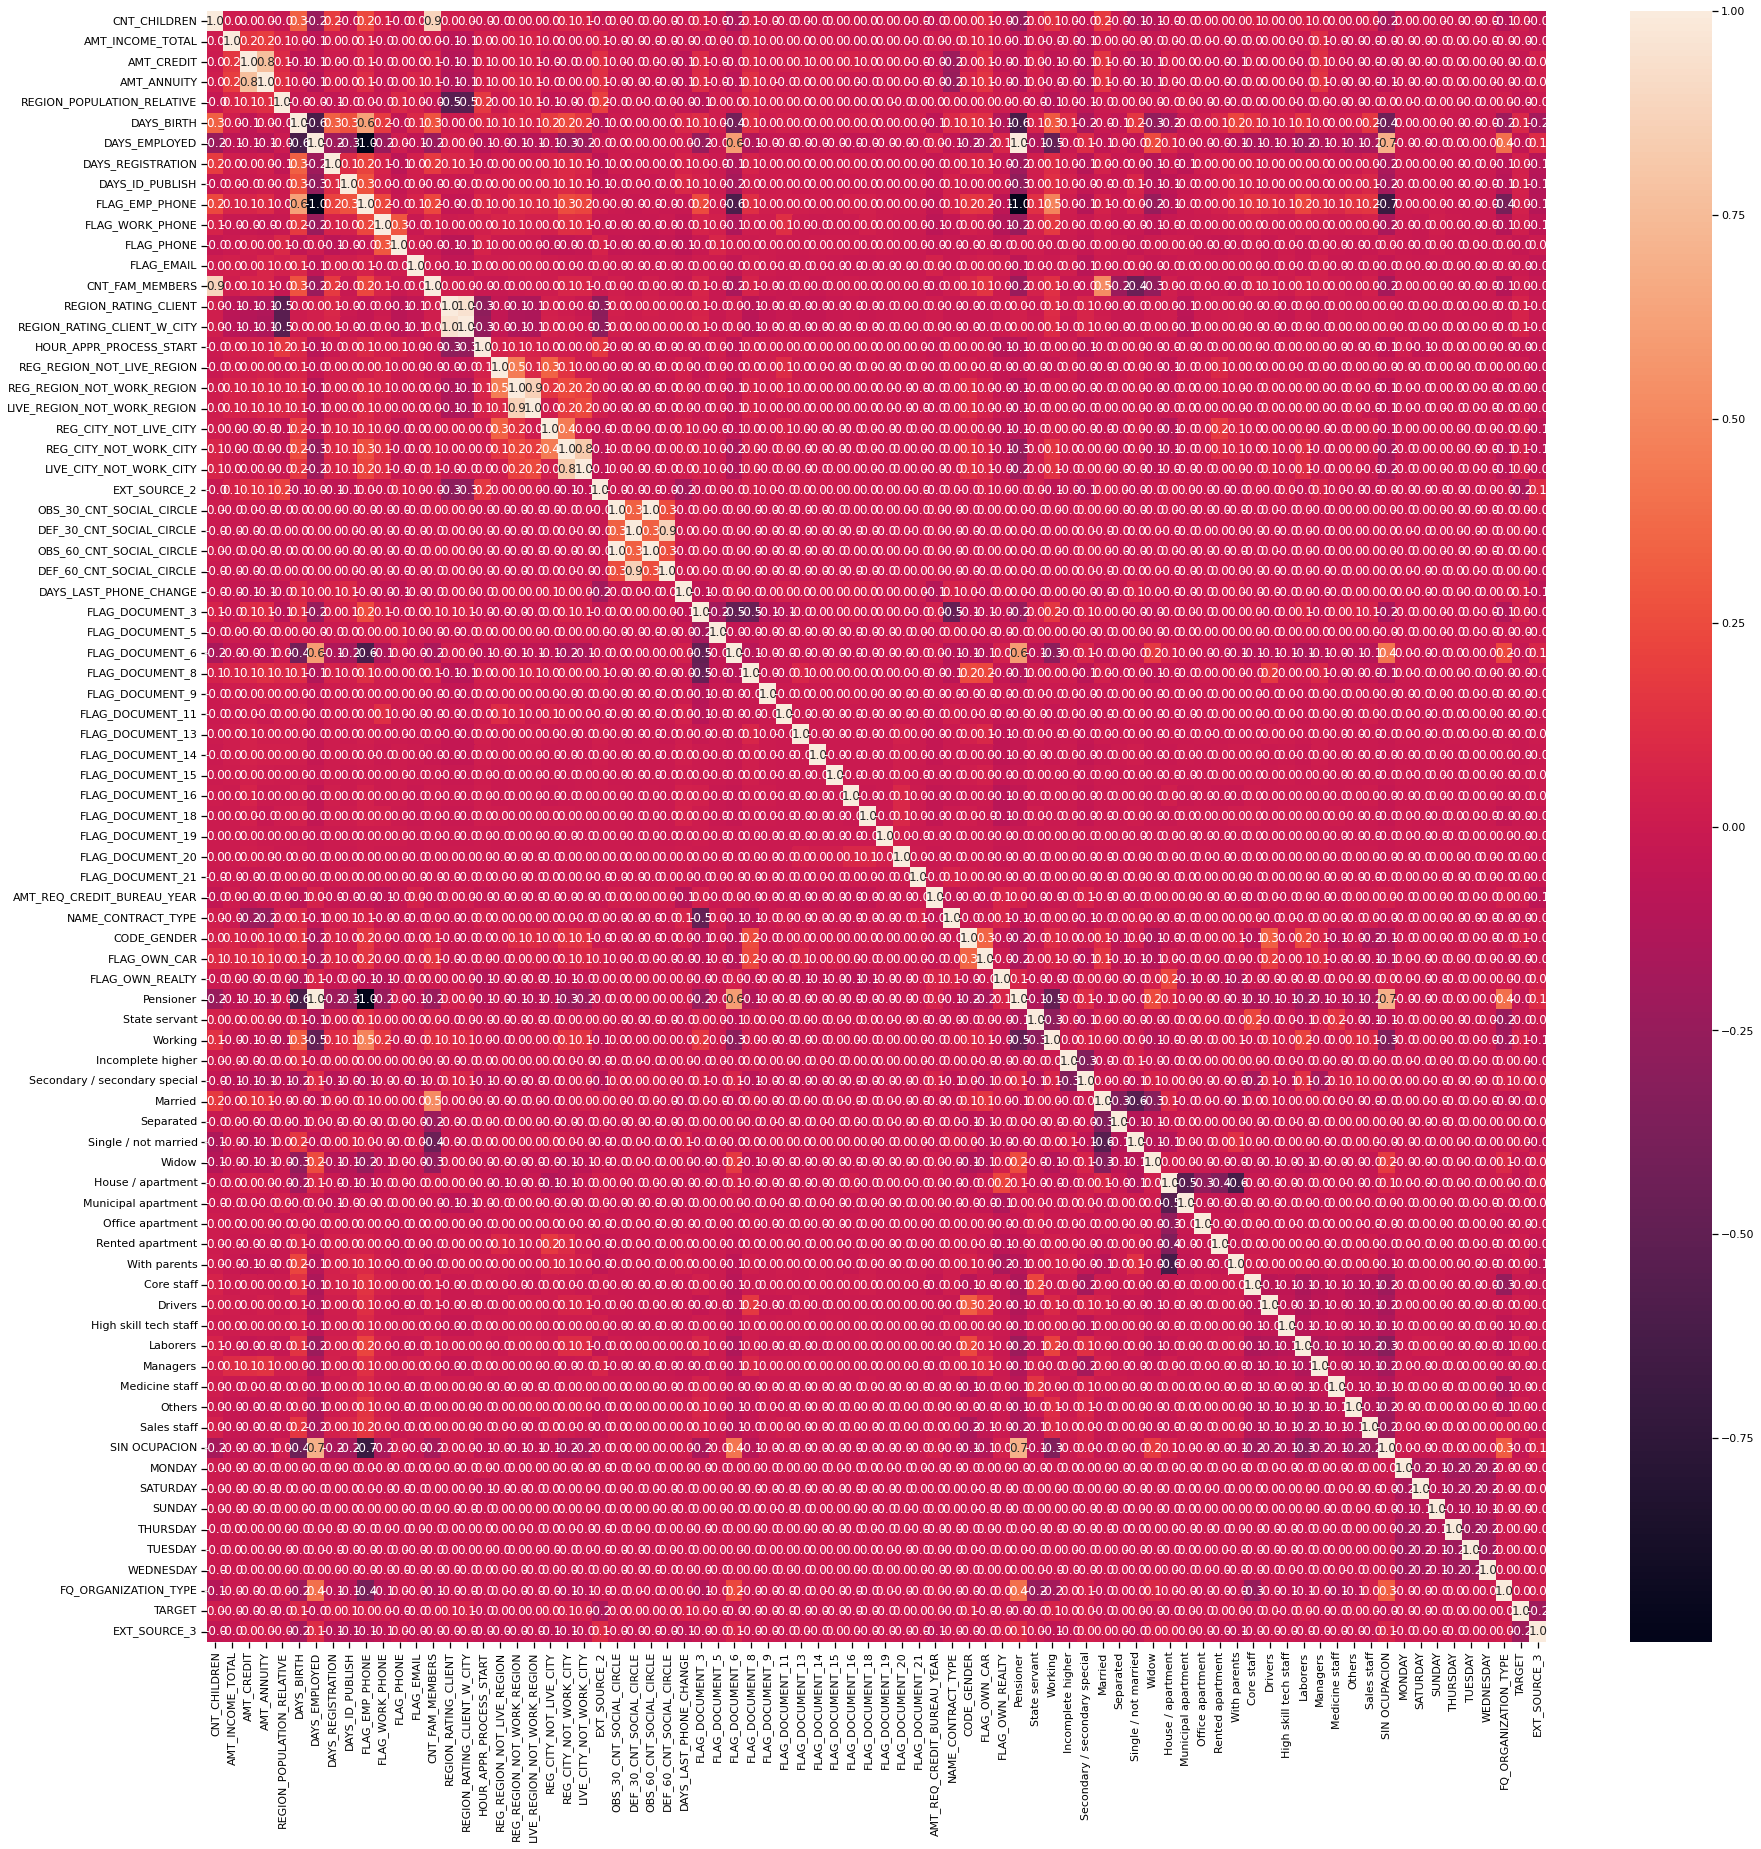

In [ ]:
plt.figure(figsize = (30, 30))
sns.heatmap(
    data_scaled_imputed.drop(columns = 'SK_ID_CURR').corr(),
    annot = True,
    fmt = ".1f"
)

plt.show()

In [ ]:
def calculate_R2_variables(df):
    S = df.cov()
    S_inv = np.linalg.inv(S)
    R2 = 1 - 1/(np.diag(S)*np.diag(S_inv))
    return R2

In [ ]:
R2 = calculate_R2_variables(data_scaled_imputed.drop(columns = 'SK_ID_CURR'))

In [ ]:
df_R2 = pd.DataFrame(R2.reshape(1, -1), columns = data_scaled_imputed.drop(columns = 'SK_ID_CURR').columns).T.reset_index()
df_R2.rename(
    columns = {
        'index': 'ATRIBUTO',
        0: 'R2' 
    },
    inplace = True
)
df_R2.head()

,ATRIBUTO,R2
0,CNT_CHILDREN,1.000000
1,AMT_INCOME_TOTAL,0.061337
2,AMT_CREDIT,0.618195
3,AMT_ANNUITY,0.629642
4,REGION_POPULATION_RELATIVE,0.310437


In [ ]:
df_R2[df_R2['R2'] > 0.9]

,ATRIBUTO,R2
0,CNT_CHILDREN,1.000000
6,DAYS_EMPLOYED,0.999702
9,FLAG_EMP_PHONE,0.999659
13,CNT_FAM_MEMBERS,1.000000
14,REGION_RATING_CLIENT,0.907590
15,REGION_RATING_CLIENT_W_CITY,0.906230
24,OBS_30_CNT_SOCIAL_CIRCLE,0.996987
26,OBS_60_CNT_SOCIAL_CIRCLE,0.996992
29,FLAG_DOCUMENT_3,0.915167
48,Pensioner,0.999676


In [ ]:
max_R2_index = int(np.where(R2 == max(R2))[0])

max_R2_index

56

In [ ]:
data_w_o_corr = data_scaled_imputed.drop(columns = ['SK_ID_CURR', 'TARGET']).copy()

R2_ = calculate_R2_variables(data_w_o_corr)
max_R2_index = int(np.where(R2_ == max(R2_))[0])

while float(R2_[max_R2_index]) > 0.9:
    data_w_o_corr.drop(data_w_o_corr.columns[max_R2_index], axis = 1, inplace = True)
    R2_ = calculate_R2_variables(data_w_o_corr)
    R2_mean = R2_.mean()

    print(
        f'Shape: {data_w_o_corr.shape}\n'
        f'Arreglo de R2: {R2_}\n ------------------\n\n'
    )

    max_R2_index = int(np.where(R2_ == max(R2_))[0])

data_w_o_corr.head()

Shape: (307290, 78)
Arreglo de R2: [0.94347667 0.0613356  0.61817189 0.6295416  0.31042063 0.58599282
 0.99970212 0.14255759 0.13007373 0.99965873 0.19345726 0.1281733
 0.03149612 0.96218232 0.90758639 0.90621667 0.12264088 0.58915905
 0.88985729 0.86420246 0.59197422 0.86727957 0.83490344 0.17052538
 0.99698731 0.75404253 0.99699214 0.74163946 0.09633924 0.91515095
 0.376024   0.83410002 0.80492372 0.16108023 0.13351582 0.02404246
 0.0156378  0.00697697 0.03558178 0.03014451 0.00333341 0.01950303
 0.00519707 0.04983273 0.80409155 0.33057267 0.19533324 0.11657399
 0.99967618 0.27026957 0.40923399 0.14547984 0.28581947 0.64538657
 0.53953052 0.72737675 0.96378031 0.90597977 0.69805875 0.811542
 0.92652662 0.72220908 0.68013696 0.52801226 0.83282915 0.67156405
 0.47603437 0.72028306 0.74880005 0.88407397 0.40374975 0.3307385
 0.20460625 0.40330447 0.4146067  0.40803368 0.25107633 0.06539687]
 ------------------


Shape: (307290, 77)
Arreglo de R2: [0.94347558 0.06126059 0.61806524 0.6295

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,State servant,Working,Incomplete higher,Secondary / secondary special,Married,Separated,Single / not married,Municipal apartment,Office apartment,Rented apartment,With parents,Core staff,Drivers,High skill tech staff,Laborers,Managers,Medicine staff,Others,Sales staff,SIN OCUPACION,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,FQ_ORGANIZATION_TYPE,EXT_SOURCE_3
0,-0.577584,0.142334,-0.477952,-0.165929,-0.149306,1.506826,0.379922,0.579151,0.468649,-0.499074,1.599335,-0.245092,-0.062867,-0.631698,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,-1.315926,0.240461,4.156068,5.244035,-0.206953,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-0.481594,-0.324261,1.38815,-0.717873,0.664535,-0.275514,0.967611,-0.2192,0.638147,-1.329851,-0.262095,2.401647,-0.19431,-0.09259,-0.126926,-0.225192,-0.313753,-0.253807,-0.196079,2.137703,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,-0.444376,-0.351737,-0.235701,-0.443783,-0.460926,2.218238,1.322739,-1.906718
1,-0.577584,0.426982,1.726035,0.593311,-1.252967,-0.166808,1.078763,1.790876,0.468649,-0.499074,1.599335,-0.245092,-2.052397,-0.325497,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.564665,-0.175969,-0.321074,-0.276152,0.163149,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-1.016479,-0.324261,-0.72030,-0.717873,-1.504812,3.629586,-1.033473,-0.2192,-1.567038,0.751964,-0.262095,-0.416381,-0.19431,-0.09259,-0.126926,-0.225192,3.187218,-0.253807,-0.196079,-0.467792,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,2.250346,-0.351737,-0.235701,-0.443783,-0.460926,-0.450808,-0.923397,0.180453
2,-0.577584,-0.426962,-1.152880,-1.405130,-0.783513,-0.689475,0.206205,0.306861,0.468649,2.003709,1.599335,-0.245092,-0.062867,-0.937900,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.217469,-0.592400,-0.321074,-0.276152,0.178872,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-1.016479,3.083938,1.38815,1.393005,0.664535,-0.275514,0.967611,-0.2192,0.638147,-1.329851,-0.262095,2.401647,-0.19431,-0.09259,-0.126926,-0.225192,-0.313753,-0.253807,-0.196079,2.137703,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,2.250346,-0.351737,-0.235701,-0.443783,-0.460926,-0.450808,-0.865855,1.122514
3,-0.577584,-0.142314,-0.711333,0.178277,-0.929101,-0.680081,-1.375696,0.369137,0.468649,-0.499074,-0.625260,-0.245092,-0.062867,1.511712,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.712245,0.240461,-0.321074,-0.276152,0.418349,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-0.695548,-0.324261,-0.72030,-0.717873,0.664535,-0.275514,0.967611,-0.2192,0.638147,-1.329851,-0.262095,-0.416381,-0.19431,-0.09259,-0.126926,-0.225192,-0.313753,-0.253807,-0.196079,2.137703,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,-0.444376,-0.351737,-0.235701,-0.443783,-0.460926,2.218238,1.322739,0.180453
4,-0.577584,-0.199244,-0.213538,-0.361641,0.563950,-0.892493,0.191729,-0.307283,0

In [ ]:
data_w_o_corr = data_w_o_corr.merge(data_scaled_imputed[['TARGET', 'SK_ID_CURR']], left_index = True, right_index = True)

In [ ]:
np.where(R2_== max(R2_))

(array([15]),)

In [ ]:
float(R2_[np.where(R2_== max(R2_))])

0.8898398826833367

### **Checkpoint datos sin variables correlacionadas:**

In [ ]:
data_w_o_corr.to_csv("/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/data lake/data_w_o_corr.csv")

upload_file_to_S3(
    file_name = "/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/data lake/data_w_o_corr.csv",
    bucket = BUCKET_NAME,
    folder = 'REFINED-zone'
)

True

## **Eliminación de outliers:**

In [ ]:
data_w_o_corr = pd.read_csv("/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/data lake/data_w_o_corr.csv")
data_w_o_corr.drop(
    columns = 'Unnamed: 0',
    inplace = True
)
data_w_o_corr.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,State servant,Working,Incomplete higher,Secondary / secondary special,Married,Separated,Single / not married,Municipal apartment,Office apartment,Rented apartment,With parents,Core staff,Drivers,High skill tech staff,Laborers,Managers,Medicine staff,Others,Sales staff,SIN OCUPACION,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,FQ_ORGANIZATION_TYPE,EXT_SOURCE_3,TARGET,SK_ID_CURR
0,-0.577584,0.142334,-0.477952,-0.165929,-0.149306,1.506826,0.379922,0.579151,0.468649,-0.499074,1.599335,-0.245092,-0.062867,-0.631698,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,-1.315926,0.240461,4.156068,5.244035,-0.206953,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-0.481594,-0.324261,1.38815,-0.717873,0.664535,-0.275514,0.967611,-0.2192,0.638147,-1.329851,-0.262095,2.401647,-0.19431,-0.09259,-0.126926,-0.225192,-0.313753,-0.253807,-0.196079,2.137703,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,-0.444376,-0.351737,-0.235701,-0.443783,-0.460926,2.218238,1.322739,-1.906718,1.0,100002.0
1,-0.577584,0.426982,1.726035,0.593311,-1.252967,-0.166808,1.078763,1.790876,0.468649,-0.499074,1.599335,-0.245092,-2.052397,-0.325497,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.564665,-0.175969,-0.321074,-0.276152,0.163149,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-1.016479,-0.324261,-0.72030,-0.717873,-1.504812,3.629586,-1.033473,-0.2192,-1.567038,0.751964,-0.262095,-0.416381,-0.19431,-0.09259,-0.126926,-0.225192,3.187218,-0.253807,-0.196079,-0.467792,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,2.250346,-0.351737,-0.235701,-0.443783,-0.460926,-0.450808,-0.923397,0.180453,0.0,100003.0
2,-0.577584,-0.426962,-1.152880,-1.405130,-0.783513,-0.689475,0.206205,0.306861,0.468649,2.003709,1.599335,-0.245092,-0.062867,-0.937900,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.217469,-0.592400,-0.321074,-0.276152,0.178872,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-1.016479,3.083938,1.38815,1.393005,0.664535,-0.275514,0.967611,-0.2192,0.638147,-1.329851,-0.262095,2.401647,-0.19431,-0.09259,-0.126926,-0.225192,-0.313753,-0.253807,-0.196079,2.137703,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,2.250346,-0.351737,-0.235701,-0.443783,-0.460926,-0.450808,-0.865855,1.122514,0.0,100004.0
3,-0.577584,-0.142314,-0.711333,0.178277,-0.929101,-0.680081,-1.375696,0.369137,0.468649,-0.499074,-0.625260,-0.245092,-0.062867,1.511712,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.712245,0.240461,-0.321074,-0.276152,0.418349,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-0.695548,-0.324261,-0.72030,-0.717873,0.664535,-0.275514,0.967611,-0.2192,0.638147,-1.329851,-0.262095,-0.416381,-0.19431,-0.09259,-0.126926,-0.225192,-0.313753,-0.253807,-0.196079,2.137703,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,-0.444376,-0.351737,-0.235701,-0.443783,-0.460926,2.218238,1.322739,0.180453,0.0,100006.0
4,-0.577584

### Usando la media para eliminar outliers:

In [ ]:
data_w_o_corr_np = data_w_o_corr.drop(columns = ['SK_ID_CURR', 'TARGET']).to_numpy()

covariance  = np.cov(data_w_o_corr_np , rowvar=False)
covariance_inv = np.linalg.inv(covariance)

centerpoint = np.mean(data_w_o_corr_np , axis=0)

In [ ]:
from sklearn.covariance import LedoitWolf

In [ ]:
cond_cov_w_outliers = np.linalg.cond(covariance)

print(f'Número de condición de la matriz de covarianza de los datos originales: {cond_cov_w_outliers}')

Número de condición de la matriz de covarianza de los datos originales: 117.7432148275646


- Estimando la matriz de covarianza usando el shrinkage de Ledoit and Wolf:

In [ ]:
cov_LedoitWolf = LedoitWolf().fit(data_w_o_corr_np)
cov_LedoitWolf_inv = np.linalg.inv(cov_LedoitWolf.covariance_)

cond_cov_LW = np.linalg.cond(cov_LedoitWolf.covariance_)

print(f'Número de condición de la matriz de covarianza de los datos originales usando el shrinkage de LW: {cond_cov_LW}')

Número de condición de la matriz de covarianza de los datos originales usando el shrinkage de LW: 70.00119705271112


In [ ]:
# Distances between center point and 
distances = []

for i, val in enumerate(data_w_o_corr_np):

      p1 = val
      p2 = centerpoint
      distance = (p1-p2).T.dot(cov_LedoitWolf_inv).dot(p1-p2)
      distances.append(distance)

distances = np.array(distances)

# Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
#cutoff = chi2.ppf(0.95, data_w_o_corr_np.shape[1])
cutoff= np.percentile(distances, 85)

# Index of outliers
outlierIndexes = np.where(distances > cutoff )

In [ ]:
len(np.where(distances <= cutoff)[0])

261196

In [ ]:
data_w_o_outliers = data_w_o_corr.iloc[np.where(distances <= cutoff)[0], :]
print(f'Shape dataset sin outliers: {data_w_o_outliers.shape}')

data_w_o_outliers.head()

Shape dataset sin outliers: (261196, 73)


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,State servant,Working,Incomplete higher,Secondary / secondary special,Married,Separated,Single / not married,Municipal apartment,Office apartment,Rented apartment,With parents,Core staff,Drivers,High skill tech staff,Laborers,Managers,Medicine staff,Others,Sales staff,SIN OCUPACION,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,FQ_ORGANIZATION_TYPE,EXT_SOURCE_3,TARGET,SK_ID_CURR
0,-0.577584,0.142334,-0.477952,-0.165929,-0.149306,1.506826,0.379922,0.579151,0.468649,-0.499074,1.599335,-0.245092,-0.062867,-0.631698,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,-1.315926,0.240461,4.156068,5.244035,-0.206953,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-0.481594,-0.324261,1.38815,-0.717873,0.664535,-0.275514,0.967611,-0.2192,0.638147,-1.329851,-0.262095,2.401647,-0.19431,-0.09259,-0.126926,-0.225192,-0.313753,-0.253807,-0.196079,2.137703,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,-0.444376,-0.351737,-0.235701,-0.443783,-0.460926,2.218238,1.322739,-1.906718,1.0,100002.0
1,-0.577584,0.426982,1.726035,0.593311,-1.252967,-0.166808,1.078763,1.790876,0.468649,-0.499074,1.599335,-0.245092,-2.052397,-0.325497,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.564665,-0.175969,-0.321074,-0.276152,0.163149,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-1.016479,-0.324261,-0.72030,-0.717873,-1.504812,3.629586,-1.033473,-0.2192,-1.567038,0.751964,-0.262095,-0.416381,-0.19431,-0.09259,-0.126926,-0.225192,3.187218,-0.253807,-0.196079,-0.467792,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,2.250346,-0.351737,-0.235701,-0.443783,-0.460926,-0.450808,-0.923397,0.180453,0.0,100003.0
2,-0.577584,-0.426962,-1.152880,-1.405130,-0.783513,-0.689475,0.206205,0.306861,0.468649,2.003709,1.599335,-0.245092,-0.062867,-0.937900,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.217469,-0.592400,-0.321074,-0.276152,0.178872,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-1.016479,3.083938,1.38815,1.393005,0.664535,-0.275514,0.967611,-0.2192,0.638147,-1.329851,-0.262095,2.401647,-0.19431,-0.09259,-0.126926,-0.225192,-0.313753,-0.253807,-0.196079,2.137703,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,2.250346,-0.351737,-0.235701,-0.443783,-0.460926,-0.450808,-0.865855,1.122514,0.0,100004.0
3,-0.577584,-0.142314,-0.711333,0.178277,-0.929101,-0.680081,-1.375696,0.369137,0.468649,-0.499074,-0.625260,-0.245092,-0.062867,1.511712,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.712245,0.240461,-0.321074,-0.276152,0.418349,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-0.695548,-0.324261,-0.72030,-0.717873,0.664535,-0.275514,0.967611,-0.2192,0.638147,-1.329851,-0.262095,-0.416381,-0.19431,-0.09259,-0.126926,-0.225192,-0.313753,-0.253807,-0.196079,2.137703,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,-0.444376,-0.351737,-0.235701,-0.443783,-0.460926,2.218238,1.322739,0.180453,0.0,100006.0
4,-0.577584

In [ ]:
data_w_o_outliers.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,State servant,Working,Incomplete higher,Secondary / secondary special,Married,Separated,Single / not married,Municipal apartment,Office apartment,Rented apartment,With parents,Core staff,Drivers,High skill tech staff,Laborers,Managers,Medicine staff,Others,Sales staff,SIN OCUPACION,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,FQ_ORGANIZATION_TYPE,EXT_SOURCE_3,TARGET,SK_ID_CURR
count,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,2.611960e+05,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,2.611960e+05,261196.000000,261196.000000,2.611960e+05,2.611960e+05,2.611960e+05,2.611960e+05,2.611960e+05,2.611960e+05,2.611960e+05,2.611960e+05,2.611960e+05,2.611960e+05,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,2.611960e+05,2.611960e+05,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000,261196.000000
mean,-0.016792,-0.026770,-0.032680,-0.038055,-0.034378,-0.066434,-0.023778,-0.026084,-0.057845,-0.038937,-0.017149,-0.045141,0.040336,-0.027162,-1.238871e-01,-0.122254,-0.084769,-0.113319,-0.065444,-0.037281,-0.006590,-0.032328,-0.061747,-0.041115,-0.016808,-1.238600e-01,0.035103,-0.038556,-6.245588e-02,-6.269175e-02,-5.947120e-02,-5.422828e-02,-3.476763e-02,-1.001745e-01,-9.053040e-02,-2.441073e-02,-2.253712e-02,-1.831122e-02,0.016631,-0.014830,-0.024169,-0.014767,0.066153,-0.038049,0.008209,-0.053593,0.052835,0.025741,-0.019032,-0.025347,-0.052426,-9.259042e-02,-1.269258e-01,-0.045557,-0.011515,-0.009384,-0.038351,0.010481,-0.016166,-0.038331,0.000213,0.002366,0.044880,0.002499,-0.000760,-0.022924,0.002253,0.002909,0.002978,0.021072,0.042114,0.080001,278102.590109
std,0.972951,0.363653,0.954463,0.923883,0.939795,0.997823,1.009257,0.997176,1.045456,0.969486,0.991466,0.908213,0.963386,0.987034,3.684560e-13,0.696126,0.773631,0.794355,0.954973,0.967668,0.993543,0.893996,0.804972,0.839633,0.997109,3.741459e-13,1.049201,0.938311,2.004234e-13,4.432296e-13,9.973985e-14,8.592449e-14,3.574925e-14,5.723627e-13,4.165565e-13,1.112550e-13,8.088684e-14,1.070639e-13,0.933842,0.979212,0.991580,0.994895,0.969557,0.933239,0.999698,0.874290,0.973722,0.992203,0.965408,0.974187,0.858856,4.930649e-13,6.716862e-14,0.897709,0.983251,0.982510,0.900257,1.008661,0.972091,0.882189,1.000316,1.003055,1.016906,1.002252,0.999054,0.952692,1.002036,1.002480,1.002625,0.990000,0.895886,0.271296,102810.507047
min,-0.577584,-0.603444,-1.376533,-1.759587,-1.470516,-2.099829,-5.587758,-2.784395,-2.133791,-0.499074,-0.625260,-0.245092,-2.052397,-3.693713,-1.238871e-01,-0.231221,-0.205869,-0.291190,-0.547341,-0.467906,-2.692220,-0.592400,-0.321074,-0.276152,-4.026496,-1.238600e-01,-0.310759,-0.297586,-6.245588e-0

In [ ]:
data_w_o_outliers_np = data_w_o_outliers.drop(columns = ['SK_ID_CURR', 'TARGET']).to_numpy()

cov_w_o_outliers_mean =  np.cov(data_w_o_outliers_np , rowvar = False)
trace_cov_w_o_outliers = np.trace(cov_w_o_outliers_mean)

print(f'Varianza global de la matriz de covarianza de los datos sin outliers, usando la media: {trace_cov_w_o_outliers}')


Varianza global de la matriz de covarianza de los datos sin outliers, usando la media: 51.12276900650719


### Usando la mediana para eliminar outliers:

In [ ]:
data_w_o_corr_np = data_w_o_corr.drop(columns = ['SK_ID_CURR', 'TARGET']).to_numpy()

centerpoint = np.median(data_w_o_corr_np , axis=0)

In [ ]:
# Distances between center point and 
distances = []

for i, val in enumerate(data_w_o_corr_np):

      p1 = val
      p2 = centerpoint
      distance = (p1-p2).T.dot(cov_LedoitWolf_inv).dot(p1-p2)
      distances.append(distance)
      
distances = np.array(distances)

# Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
#cutoff = chi2.ppf(0.95, data_w_o_corr_np.shape[1])
cutoff= np.percentile(distances, 85)

# Index of outliers
outlierIndexes = np.where(distances > cutoff )


In [ ]:
data_w_o_outliers = data_w_o_corr.iloc[np.where(distances <= cutoff)[0], :]
print(f'Shape dataset sin outliers: {data_w_o_outliers.shape}')

data_w_o_outliers.head()

Shape dataset sin outliers: (261196, 73)


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,State servant,Working,Incomplete higher,Secondary / secondary special,Married,Separated,Single / not married,Municipal apartment,Office apartment,Rented apartment,With parents,Core staff,Drivers,High skill tech staff,Laborers,Managers,Medicine staff,Others,Sales staff,SIN OCUPACION,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,FQ_ORGANIZATION_TYPE,EXT_SOURCE_3,TARGET,SK_ID_CURR
0,-0.577584,0.142334,-0.477952,-0.165929,-0.149306,1.506826,0.379922,0.579151,0.468649,-0.499074,1.599335,-0.245092,-0.062867,-0.631698,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,-1.315926,0.240461,4.156068,5.244035,-0.206953,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-0.481594,-0.324261,1.38815,-0.717873,0.664535,-0.275514,0.967611,-0.2192,0.638147,-1.329851,-0.262095,2.401647,-0.19431,-0.09259,-0.126926,-0.225192,-0.313753,-0.253807,-0.196079,2.137703,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,-0.444376,-0.351737,-0.235701,-0.443783,-0.460926,2.218238,1.322739,-1.906718,1.0,100002.0
1,-0.577584,0.426982,1.726035,0.593311,-1.252967,-0.166808,1.078763,1.790876,0.468649,-0.499074,1.599335,-0.245092,-2.052397,-0.325497,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.564665,-0.175969,-0.321074,-0.276152,0.163149,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-1.016479,-0.324261,-0.72030,-0.717873,-1.504812,3.629586,-1.033473,-0.2192,-1.567038,0.751964,-0.262095,-0.416381,-0.19431,-0.09259,-0.126926,-0.225192,3.187218,-0.253807,-0.196079,-0.467792,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,2.250346,-0.351737,-0.235701,-0.443783,-0.460926,-0.450808,-0.923397,0.180453,0.0,100003.0
2,-0.577584,-0.426962,-1.152880,-1.405130,-0.783513,-0.689475,0.206205,0.306861,0.468649,2.003709,1.599335,-0.245092,-0.062867,-0.937900,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.217469,-0.592400,-0.321074,-0.276152,0.178872,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-1.016479,3.083938,1.38815,1.393005,0.664535,-0.275514,0.967611,-0.2192,0.638147,-1.329851,-0.262095,2.401647,-0.19431,-0.09259,-0.126926,-0.225192,-0.313753,-0.253807,-0.196079,2.137703,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,2.250346,-0.351737,-0.235701,-0.443783,-0.460926,-0.450808,-0.865855,1.122514,0.0,100004.0
3,-0.577584,-0.142314,-0.711333,0.178277,-0.929101,-0.680081,-1.375696,0.369137,0.468649,-0.499074,-0.625260,-0.245092,-0.062867,1.511712,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.712245,0.240461,-0.321074,-0.276152,0.418349,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-0.695548,-0.324261,-0.72030,-0.717873,0.664535,-0.275514,0.967611,-0.2192,0.638147,-1.329851,-0.262095,-0.416381,-0.19431,-0.09259,-0.126926,-0.225192,-0.313753,-0.253807,-0.196079,2.137703,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,-0.444376,-0.351737,-0.235701,-0.443783,-0.460926,2.218238,1.322739,0.180453,0.0,100006.0
4,-0.577584

In [ ]:
data_w_o_outliers_np = data_w_o_outliers.drop(columns = ['SK_ID_CURR', 'TARGET']).to_numpy()

cov_w_o_outliers_median =  np.cov(data_w_o_outliers_np , rowvar = False)
trace_cov_w_o_outliers = np.trace(cov_w_o_outliers_median)

print(f'Varianza global de la matriz de covarianza de los datos sin outliers, usando la mediana: {trace_cov_w_o_outliers}')


Varianza global de la matriz de covarianza de los datos sin outliers, usando la mediana: 51.17370494675111


## **Checkpoint data sin outliers:**

In [ ]:
data_w_o_outliers.to_csv("/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/data lake/data_w_o_outliers.csv")

upload_file_to_S3(
    file_name = "/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/data lake/data_w_o_outliers.csv",
    bucket = BUCKET_NAME,
    folder = 'REFINED-zone'
)

True

### **Preguntar:** Cómo comparar el impacto en la eliminación de otuliers al usar el centrado de los datos con respecto a la media, y con respecto a la mediana

## **Reducción de dimensionalidad:**

In [ ]:
data_w_o_outliers = pd.read_csv("/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/data lake/data_w_o_outliers.csv")
data_w_o_outliers.drop(
    columns = 'Unnamed: 0',
    inplace = True
)
print(f'Shape del dataset: {data_w_o_outliers.shape}')
data_w_o_outliers.head()

Shape del dataset: (261196, 73)


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,State servant,Working,Incomplete higher,Secondary / secondary special,Married,Separated,Single / not married,Municipal apartment,Office apartment,Rented apartment,With parents,Core staff,Drivers,High skill tech staff,Laborers,Managers,Medicine staff,Others,Sales staff,SIN OCUPACION,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,FQ_ORGANIZATION_TYPE,EXT_SOURCE_3,TARGET,SK_ID_CURR
0,-0.577584,0.142334,-0.477952,-0.165929,-0.149306,1.506826,0.379922,0.579151,0.468649,-0.499074,1.599335,-0.245092,-0.062867,-0.631698,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,-1.315926,0.240461,4.156068,5.244035,-0.206953,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-0.481594,-0.324261,1.38815,-0.717873,0.664535,-0.275514,0.967611,-0.2192,0.638147,-1.329851,-0.262095,2.401647,-0.19431,-0.09259,-0.126926,-0.225192,-0.313753,-0.253807,-0.196079,2.137703,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,-0.444376,-0.351737,-0.235701,-0.443783,-0.460926,2.218238,1.322739,-1.906718,1.0,100002.0
1,-0.577584,0.426982,1.726035,0.593311,-1.252967,-0.166808,1.078763,1.790876,0.468649,-0.499074,1.599335,-0.245092,-2.052397,-0.325497,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.564665,-0.175969,-0.321074,-0.276152,0.163149,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-1.016479,-0.324261,-0.72030,-0.717873,-1.504812,3.629586,-1.033473,-0.2192,-1.567038,0.751964,-0.262095,-0.416381,-0.19431,-0.09259,-0.126926,-0.225192,3.187218,-0.253807,-0.196079,-0.467792,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,2.250346,-0.351737,-0.235701,-0.443783,-0.460926,-0.450808,-0.923397,0.180453,0.0,100003.0
2,-0.577584,-0.426962,-1.152880,-1.405130,-0.783513,-0.689475,0.206205,0.306861,0.468649,2.003709,1.599335,-0.245092,-0.062867,-0.937900,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.217469,-0.592400,-0.321074,-0.276152,0.178872,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-1.016479,3.083938,1.38815,1.393005,0.664535,-0.275514,0.967611,-0.2192,0.638147,-1.329851,-0.262095,2.401647,-0.19431,-0.09259,-0.126926,-0.225192,-0.313753,-0.253807,-0.196079,2.137703,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,2.250346,-0.351737,-0.235701,-0.443783,-0.460926,-0.450808,-0.865855,1.122514,0.0,100004.0
3,-0.577584,-0.142314,-0.711333,0.178277,-0.929101,-0.680081,-1.375696,0.369137,0.468649,-0.499074,-0.625260,-0.245092,-0.062867,1.511712,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.712245,0.240461,-0.321074,-0.276152,0.418349,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-0.695548,-0.324261,-0.72030,-0.717873,0.664535,-0.275514,0.967611,-0.2192,0.638147,-1.329851,-0.262095,-0.416381,-0.19431,-0.09259,-0.126926,-0.225192,-0.313753,-0.253807,-0.196079,2.137703,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,-0.444376,-0.351737,-0.235701,-0.443783,-0.460926,2.218238,1.322739,0.180453,0.0,100006.0
4,-0.577584

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X = data_w_o_outliers.drop(columns = ['TARGET', 'SK_ID_CURR'])
y = data_w_o_outliers['TARGET']

pca_model = PCA()
pca_model.fit(X)

X_pca = pca_model.transform(X)

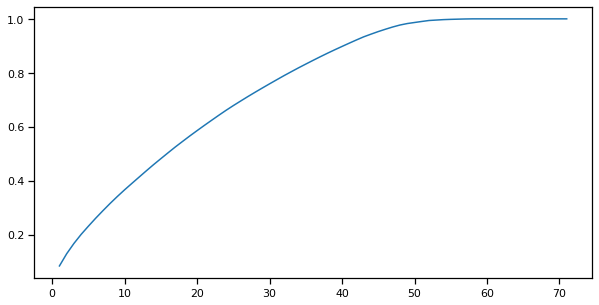

In [ ]:
explained_variance = []

for i, var in enumerate(pca_model.explained_variance_ratio_):
    
    if i == 0:
        explained_variance.append(var)
    else:
        explained_variance.append(explained_variance[i - 1] + var)

plt.figure(figsize = (10, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance)
plt.show()

In [ ]:
index_pca_significant = max(np.where(np.array(explained_variance) <= 0.9)[0])
index_pca_significant

39

In [ ]:
loadings = pca_model.components_

loadings = pca_model.components_
num_pc = pca_model.n_features_
pc_list = ["Z"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = X.columns.values
loadings_df = loadings_df.set_index('variable')


loadings_df.head()

,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10,Z11,Z12,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Z21,Z22,Z23,Z24,Z25,Z26,Z27,Z28,Z29,Z30,Z31,Z32,Z33,Z34,Z35,Z36,Z37,Z38,Z39,Z40,Z41,Z42,Z43,Z44,Z45,Z46,Z47,Z48,Z49,Z50,Z51,Z52,Z53,Z54,Z55,Z56,Z57,Z58,Z59,Z60,Z61,Z62,Z63,Z64,Z65,Z66,Z67,Z68,Z69,Z70,Z71
variable,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CNT_CHILDREN,-0.167039,0.019489,0.001598,-0.193978,-0.023573,-0.001032,-0.088177,0.143745,-0.173727,-0.016694,-0.006704,0.015804,0.010221,0.095308,0.014893,-0.030287,-0.087306,0.005116,0.397037,-0.003183,0.051362,-0.031910,0.090216,-0.275782,-0.117517,0.096904,-0.008051,-0.004392,0.033828,-0.097445,0.130530,0.101376,0.019040,0.470890,-0.241870,0.023307,0.149059,-0.208046,-0.035761,0.009851,-0.029691,-0.266116,-0.027844,-0.033266,0.045300,-0.149254,-0.003494,0.317935,-0.028107,-0.006930,0.040811,0.008293,-0.000683,0.000987,0.004115,-0.000560,0.002144,-0.001350,0.000023,0.000058,1.719137e-16,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
AMT_INCOME_TOTAL,-0.028060,0.113434,-0.004696,0.026124,-0.035426,0.033716,0.052912,-0.007964,0.006624,-0.022086,0.001716,-0.000124,0.000245,0.002437,0.011812,-0.015550,0.024881,0.012304,-0.000124,-0.002568,0.011004,-0.008277,0.026783,0.022010,-0.009206,0.010149,-0.028213,0.004646,-0.003304,-0.042807,0.004342,-0.001423,-0.012409,-0.013294,-0.001951,-0.017764,0.000586,0.008020,-0.000935,0.023519,-0.011754,-0.013112,0.012251,-0.023876,-0.017613,-0.006082,0.023974,0.007468,0.037747,0.006556,0.084805,0.096987,0.968671,-0.117939,-0.007047,-0.027228,0.007552,-0.001156,0.000356,0.000094,-7.063978e-17,-6.007619e-17,1.050003e-16,-3.791434e-17,2.942855e-17,1.462802e-16,3.828951e-17,2.949607e-17,-1.717376e-16,-8.500145e-17,-3.209238e-17
AMT_CREDIT,-0.027905,0.411793,-0.003270,-0.105003,0.094967,0.063198,0.367859,-0.221427,0.051377,0.011738,-0.006744,-0.006646,0.017207,0.067748,-0.081307,0.025684,0.009336,0.029320,-0.031329,-0.064702,-0.062370,0.054405,-0.006277,-0.080631,0.039314,-0.054998,-0.101021,-0.068969,-0.084972,-0.215742,0.056496,-0.013697,-0.047140,-0.015525,-0.001402,-0.016915,-0.016774,-0.010261,-0.037270,0.091901,-0.078940,-0.076607,0.102165,-0.004020,0.068902,0.007378,-0.034840,0.033991,0.013441,-0.008132,-0.041521,-0.682123,-0.008224,0.001864,0.000715,-0.001486,0.002622,-0.001314,-0.000093,-0.000111,-3.329579e-17,9.352446e-17,-7.968039e-17,1.203413e-16,1.100677e-16,-1.559299e-16,-7.314961e-17,4.932043e-17,3.014669e-17,-2.396125e-17,-3.023500e-17
AMT_ANNUITY,-0.053720,0.411091,0.012265,-0.079953,0.043413,0.071545,0.371973,-0.203826,0.033003,0.002869,-0.005261,-0.010466,0.014138,0.059840,-0.078493,0.028918,0.013583,0.034500,-0.022845,-0.037156,-0.006034,0.027919,-0.008727,-0.074969,0.011296,-0.029957,-0.092192,-0.050287,-0.071394,-0.166265,0.071769,-0.009531,-0.008760,-0.001604,0.014427,-0.021023,-0.002003,-0.020816,-0.016020,0.069123,-0.060287,-0.051705,0.104560,-0.030159,0.040725,0.006821,0.004750,-0.044335,0.022960,0.006324,-0.023458,0.714590,-0.150669,0.017798,0.000656,-0.002063,0.000577,0.000908,0.000042,0.000069,9.050393e-17,8.072937e-17,-6.526220e-17,4.848623e-17,6.154778e-17,4.024323e-17,-9.638081e-17,8.879380e-17,4.957160e-17,8.273185e-17,-3.598746e-17
REGION_POPULATION_RELATIVE,0.018022,0.230836,-0.094513,0.333244,0.037063,-0.108352,-0.028411,0.209784,-0.068097,-0.043749,-0.005268,-0.005344,-0.010545,0.025132,-0.071012,0.150594,-0.038972,0.016408,0.007032,-0.082822,0.217249,-0.011799,0.021441,-0.102778,-0.120222,0.032542,0.117411,0.118912,0.171500,-0.162848,0.019070,0.173674,0.010718,-0.140305,-0.009603,0.151157,-0.224208,0.053419,0.135195,-0.052554,0.071598,-0.048722,-0.037840,0.055827,-0.077886,-0.147905,-0.614552,-0.009646,-0.005988,0.000760,-0.040714,0.002247,-0.009473,0.000691,0.000854,-0.000703,-0.000223,-0.000163,0.000068,-0.000039,-3.282413e-17,7.192932e-17,8.167002e-17,3.683764e-18,-1.232842e-17,-1.454860e-17,-6.984593e-17,2.625680e-17,-6.9

In [ ]:
X_ = X_pca[:, :40]
X_.shape

(261196, 40)

# **Primer Clasificador:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix

In [ ]:
tree_classifier = DecisionTreeClassifier(max_depth = 10, random_state = 0)
tree_classifier.fit(X_, y)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [ ]:
y_pred = tree_classifier.predict(X_)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96    240314
         1.0       0.79      0.07      0.14     20882

    accuracy                           0.92    261196
   macro avg       0.86      0.54      0.55    261196
weighted avg       0.91      0.92      0.89    261196



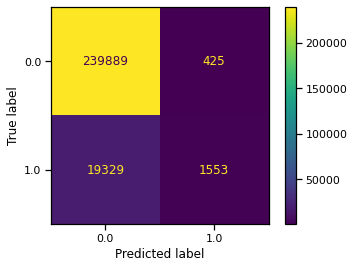

In [ ]:
plot_confusion_matrix(tree_classifier, X_, y)
plt.show()

## Balanceo con números aleatorios:

In [ ]:
full_idx_0 = data_w_o_outliers[data_w_o_outliers['TARGET'] == 0].index
size_1 =len(data_w_o_outliers[data_w_o_outliers['TARGET'] == 1])

idx_0 = np.random.choice(full_idx_0, size = size_1)
X_0 = X_[idx_0, :]
y_0 = y[idx_0]

X_0.shape, y_0.shape

((20882, 40), (20882,))

In [ ]:
full_idx_1 = data_w_o_outliers[data_w_o_outliers['TARGET'] == 1].index
size_1 =len(data_w_o_outliers[data_w_o_outliers['TARGET'] == 1])

idx_1 = np.random.choice(full_idx_1, size = size_1)
X_1 = X_[idx_1, :]
y_1 = y[idx_1]

X_1.shape, y_1.shape

((20882, 40), (20882,))

In [ ]:
X_b = np.append(X_0, X_1, axis = 0)
y_b = np.append(y_0, y_1, axis = 0)

X_b.shape, y_b.shape

((41764, 40), (41764,))

In [ ]:
tree_classifier = DecisionTreeClassifier(max_depth = 10, random_state = 0)
tree_classifier.fit(X_b, y_b)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [ ]:
y_pred_b = tree_classifier.predict(X_b)
print(classification_report(y_b, y_pred_b))

              precision    recall  f1-score   support

         0.0       0.76      0.76      0.76     20882
         1.0       0.76      0.76      0.76     20882

    accuracy                           0.76     41764
   macro avg       0.76      0.76      0.76     41764
weighted avg       0.76      0.76      0.76     41764



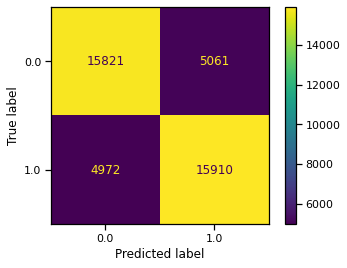

In [ ]:
plot_confusion_matrix(tree_classifier, X_b, y_b)
plt.show()

# **Next Steps:**    

- ~~Descartar variables de tiempo en bureau~~
- ~~Descarte por desbalanceo de variables categórica~~
- ~~Encoding de variables categóricas~~
- ~~Descartar variables correlacionadas~~
 * **PREGUNTAR:** ¿Cuál es la mejor manera de tratar las variables que se explican en función de las demás? Eliminarlas todas, conservar alguna de ellas...
- ~~Escalado y estandarización~~
- ~~KNN imputación de faltantes - Categóricas~~
- ~~Imputar EXT_SOURCE_3, mediante la mediana en función de TARGET~~ mediante un regresor
- ~~Reducción de dimensionalidad~~
- ~~Detección de outliers~~



## **Observaciones Retroalimentación:**    
- Detallar y expandir más la metodología. Desde la propuesta se debería haber aplicado
- Sugerencia: Para algunas partes del proyecto, usar Apache Spark. Mencionar la tecnología directamente, en el caso de colab (boto3).
- No meternos por catalogación (Glue, Athena...)
- Máx de faltantes un 20%
- Mirar la correlación con respecto a las variable de respuesta, coeficiente de Mathews, ANOVA's
- Impacto de la variable de respuesta sobre las variables cuantitivas
- Analizar variables que hacen parte del modelo socioeconómico
- Detección de atípicos, que generan perturbaciones en la modelación multivariante
- Modelo de clasificación: Se calibrar con el punto de corte de la función sigmoide de la regresión logística (ejemplo medicina). Para la muestra desbalanceada, se toman datos que equilibran la muestra (mín TARGET) muestreo aleatorio sin reempazo